In [1]:
import os
import sys
import json
from tqdm import tqdm_notebook as tqdm
from pprint import pprint

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

In [2]:
pd.set_option('max_rows', 200)
pd.set_option('max_columns', 200)

## data load

In [3]:
BASE_DIR = '../mnt/inputs/origin'
TRN_BASE_DIR = '../mnt/inputs/features/train'
TST_BASE_DIR = '../mnt/inputs/features/test'
# BASE_DIR = '../mnt/inputs/features/test'

In [4]:
!ls $BASE_DIR
!ls $TRN_BASE_DIR

data-science-bowl-2019.zip  test.csv	  train2.csv
sample_submission.csv	    train.csv	  train_labels.csv
specs.csv		    train.pkl.gz
specs_w_event_id.csv	    train1.csv
EncodingTitles.pkl  PrevAssessAccByTitle.pkl  befTargetCntFeatures.pkl
EventCount.pkl	    PrevAssessResult.pkl      immediatelyBeforeFeatures.pkl
EventCount2.pkl     SessionTime2.pkl	      targetFeatures.pkl
GameDurMiss.pkl     TypeEventCounts.pkl       worldGameNumeriacalFeatures.pkl
KernelBasics3.pkl   UserActivityCount.pkl
PrevAssessAcc.pkl   Worldcount.pkl


In [5]:
trn_df = pd.read_pickle(f'{BASE_DIR}/train.pkl.gz')
specs_df = pd.read_csv(f'{BASE_DIR}/specs_w_event_id.csv')
display(trn_df.shape, trn_df.head())

(11341042, 11)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [6]:
trn_labels_df = pd.read_csv(f'{BASE_DIR}/train_labels.csv')
display(trn_labels_df.shape, trn_labels_df.head())

(17690, 7)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [7]:
tst_df = pd.read_csv(f'{BASE_DIR}/test.csv')
tst_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [8]:
sub_df = pd.read_csv(f'{BASE_DIR}/sample_submission.csv')
sub_df.head()

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,017c5718,3
3,01a44906,3
4,01bc6cb6,3


## trn vs tst 見てみる

In [9]:
ls '../mnt/inputs/features/train/'

EncodingTitles.pkl  PrevAssessAccByTitle.pkl  befTargetCntFeatures.pkl
EventCount.pkl      PrevAssessResult.pkl      immediatelyBeforeFeatures.pkl
EventCount2.pkl     SessionTime2.pkl          targetFeatures.pkl
GameDurMiss.pkl     TypeEventCounts.pkl       worldGameNumeriacalFeatures.pkl
KernelBasics3.pkl   UserActivityCount.pkl
PrevAssessAcc.pkl   Worldcount.pkl


In [16]:
trn_kb_df = pd.read_pickle('../mnt/inputs/features/train/KernelBasics3.pkl')
tst_kb_df = pd.read_pickle('../mnt/inputs/features/test/KernelBasics3.pkl')

In [17]:
trn_bef_target_cnt_df = pd.read_pickle('../mnt/inputs/features/train/befTargetCntFeatures.pkl')
tst_bef_target_cnt_df = pd.read_pickle('../mnt/inputs/features/test/befTargetCntFeatures.pkl')

#### last truncated のもののみ使う

In [73]:
trn_kb_df = trn_kb_df.merge(trn_bef_target_cnt_df, on=['installation_id', 'game_session'], how='left')
tst_kb_df = tst_kb_df.merge(tst_bef_target_cnt_df, on=['installation_id', 'game_session'], how='left')

In [54]:
trn_kb_df = trn_kb_df.sort_values(['installation_id', 'game_session', 'f019_bef_target_cnt']).drop_duplicates(['installation_id'], keep='last')

#### util funcs

In [56]:
def plot_trn_vs_tst(trn_col, tst_col):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    col_name = trn_col.name
    print(f' ---------- {col_name} ---------- ')
    ax2 = axs[2]
    
    ax = axs[0]
    # if trn_col.dtype in []:
    #     ax.hist(trn_col, alpha=0.5)
    # else:
    #     ax.hist(trn_col, alpha=0.5)
    trn_max_ratio = trn_col.value_counts().iloc[0] / len(trn_col)
    ax.hist(trn_col, alpha=0.5, bins=20)
    ax.set_title(f'trn {col_name} : {trn_max_ratio:.4f}')
    ax.set_yscale('log')
    ax2.hist(trn_col, alpha=0.5, bins=20, normed=True)
    ax2.set_yscale('log')
    
    ax = axs[1]
    # if trn_col.dtype in []:
    #     ax.hist(trn_col, alpha=0.5)
    # else:
    #     ax.hist(trn_col, alpha=0.5)
    tst_max_ratio = tst_col.value_counts().iloc[0] / len(tst_col)
    ax.hist(tst_col, alpha=0.5, bins=20)
    ax.set_title(f'tst {col_name} : {tst_max_ratio:.4f}')
    ax.set_yscale('log')
    ax2.hist(tst_col, alpha=0.5, bins=20, normed=True)
    ax2.set_yscale('log')
    
    ax2.set_title('both, normed')

    plt.show()

 ---------- 12 Monkeys ---------- 


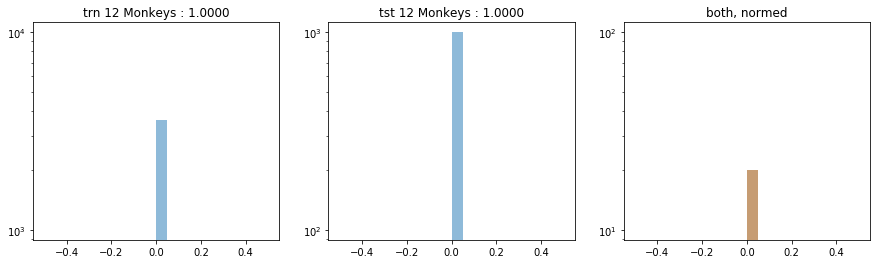

 ---------- Air Show ---------- 


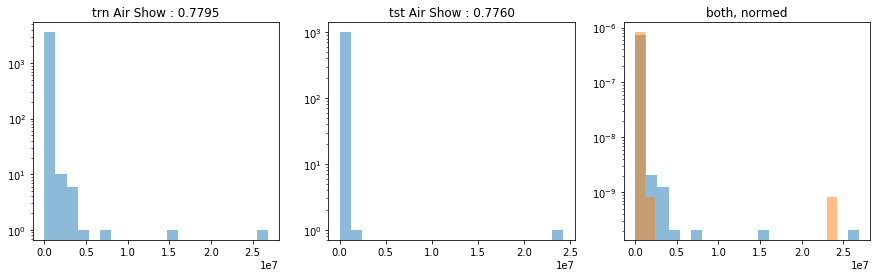

 ---------- All Star Sorting ---------- 


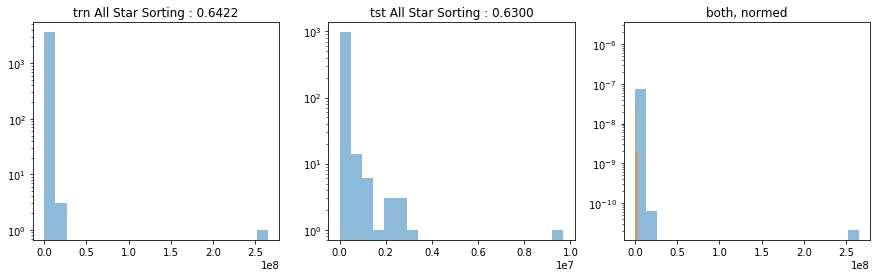

 ---------- Balancing Act ---------- 


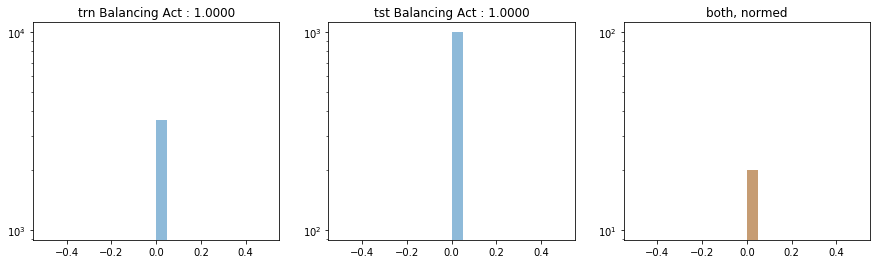

 ---------- Bird Measurer (Assessment) ---------- 


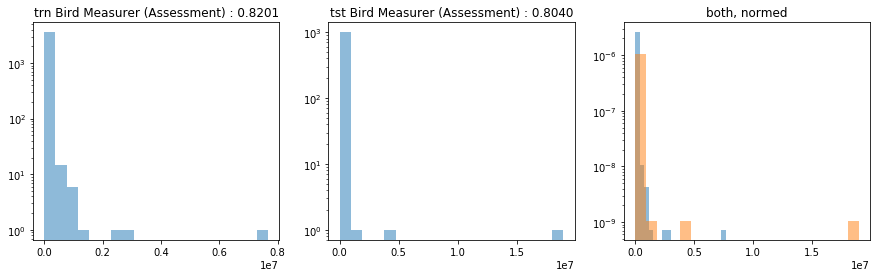

 ---------- Bottle Filler (Activity) ---------- 


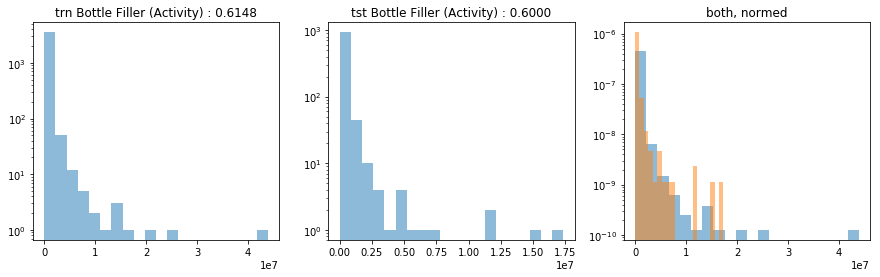

 ---------- Bubble Bath ---------- 


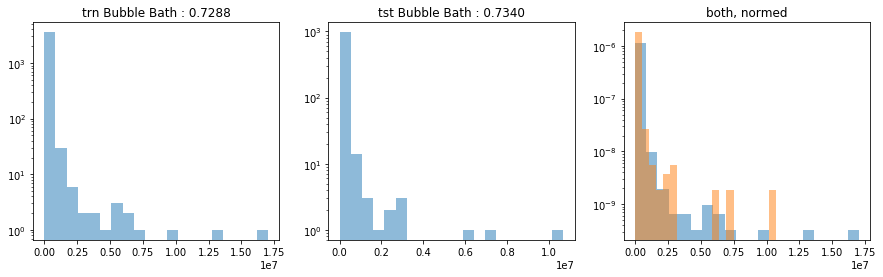

 ---------- Bug Measurer (Activity) ---------- 


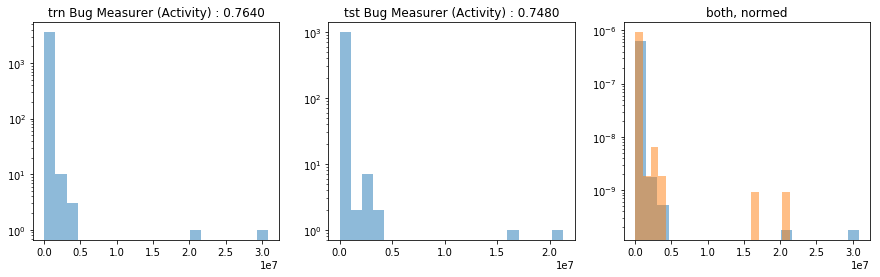

 ---------- Cart Balancer (Assessment) ---------- 


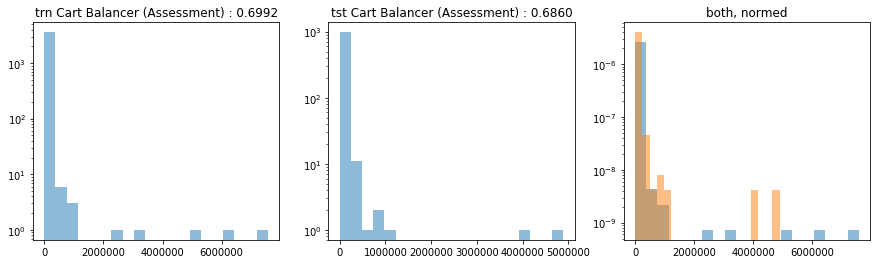

 ---------- Cauldron Filler (Assessment) ---------- 


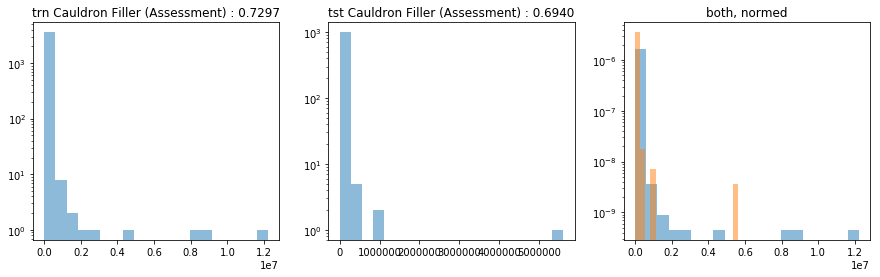

 ---------- Chest Sorter (Assessment) ---------- 


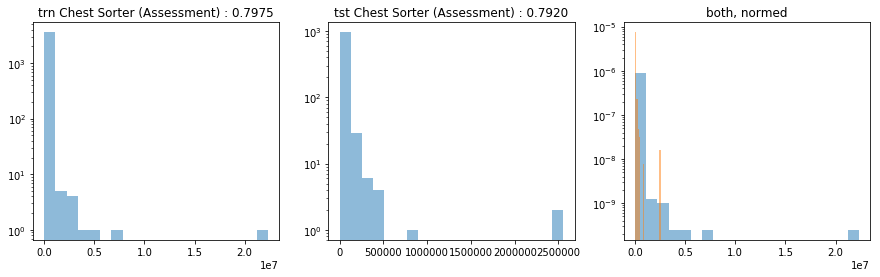

 ---------- Chicken Balancer (Activity) ---------- 


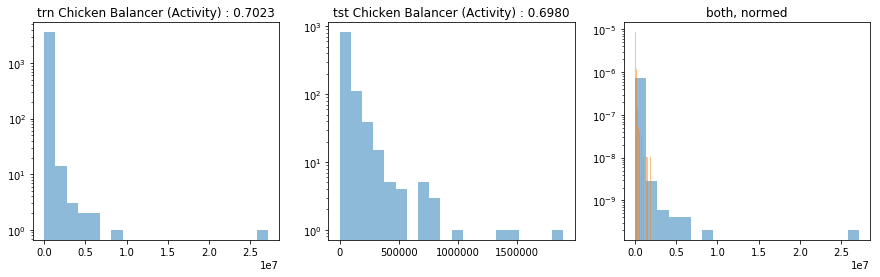

 ---------- Chow Time ---------- 


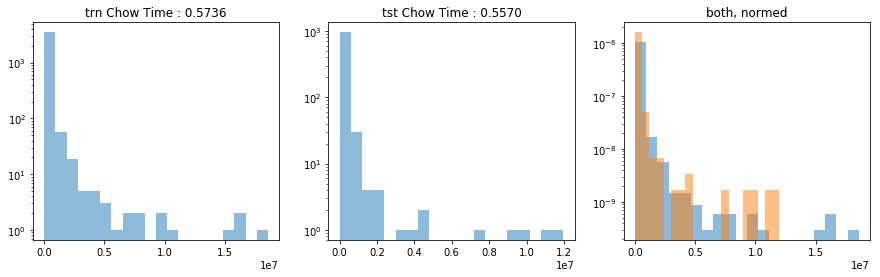

 ---------- Costume Box ---------- 


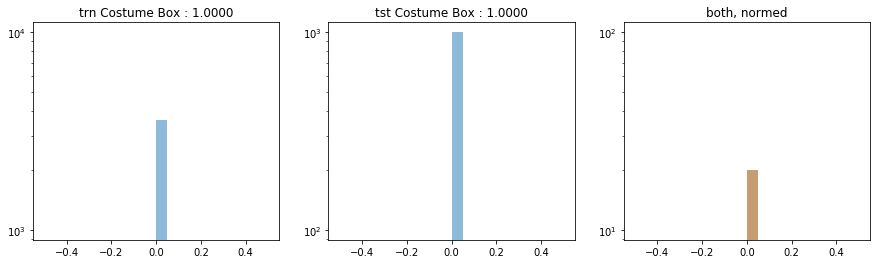

 ---------- Crystal Caves - Level 1 ---------- 


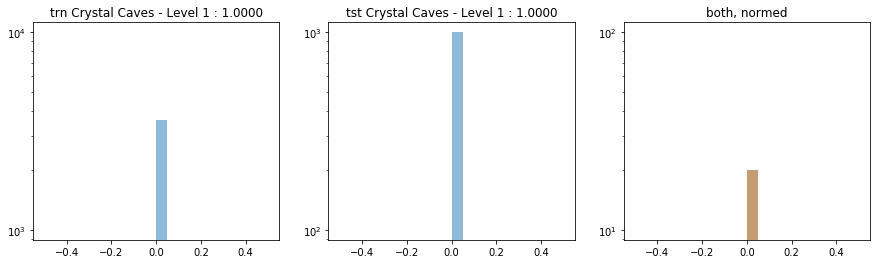

 ---------- Crystal Caves - Level 2 ---------- 


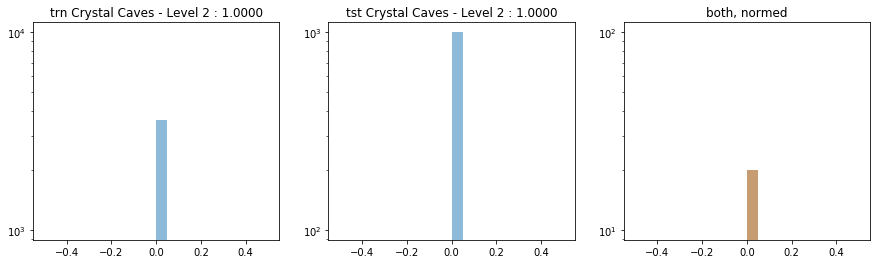

 ---------- Crystal Caves - Level 3 ---------- 


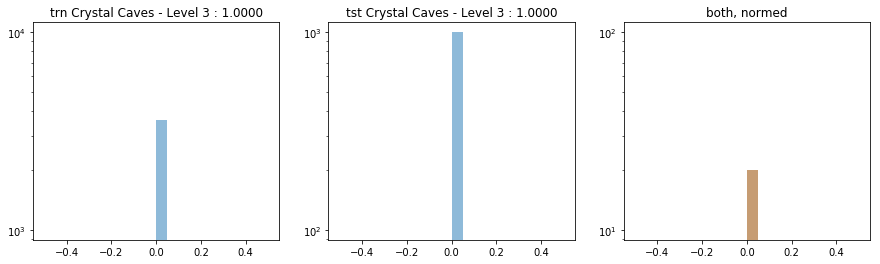

 ---------- Crystals Rule ---------- 


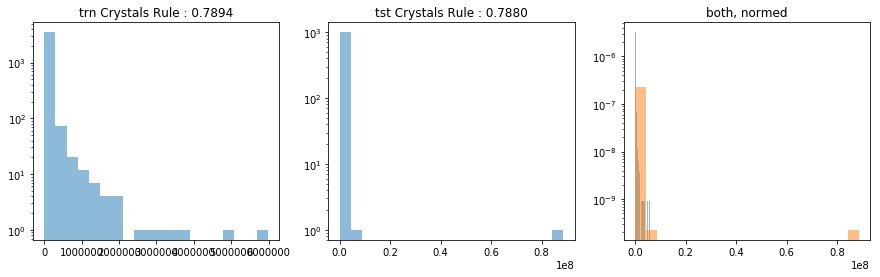

 ---------- Dino Dive ---------- 


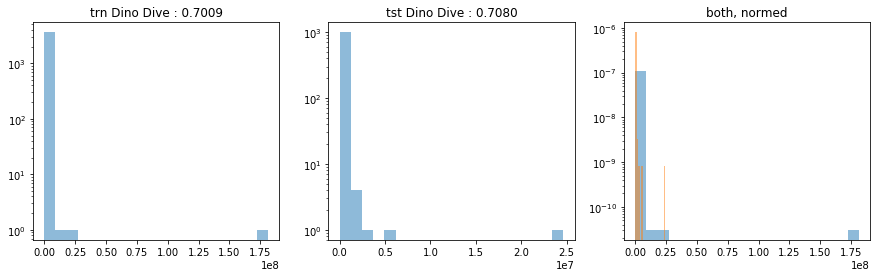

 ---------- Dino Drink ---------- 


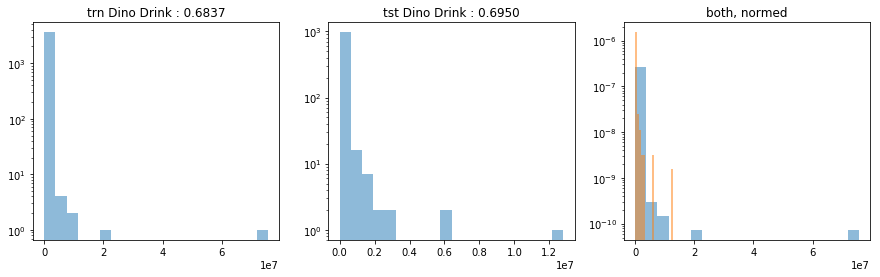

 ---------- Egg Dropper (Activity) ---------- 


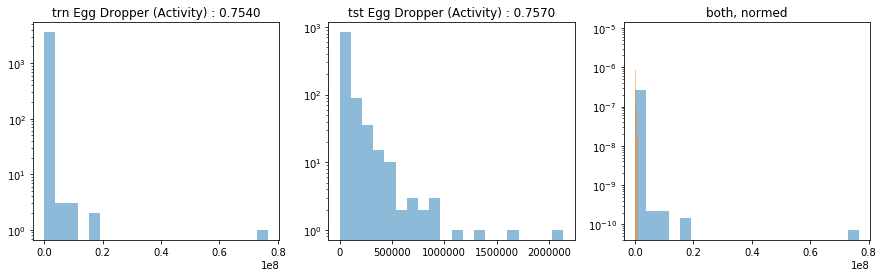

 ---------- Fireworks (Activity) ---------- 


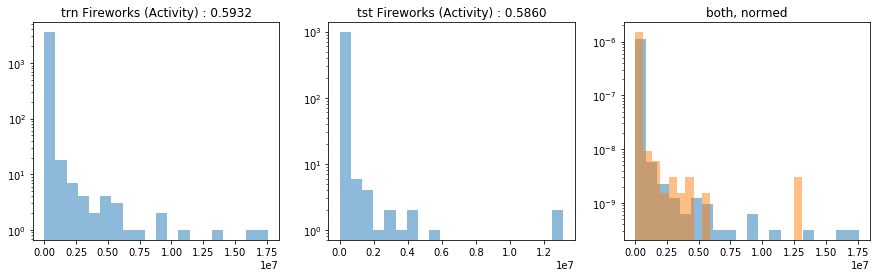

 ---------- Flower Waterer (Activity) ---------- 


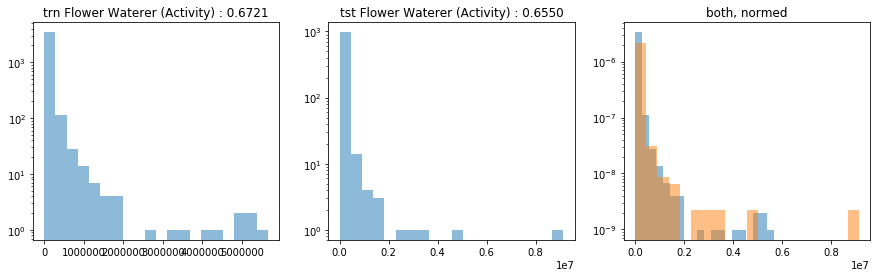

 ---------- Happy Camel ---------- 


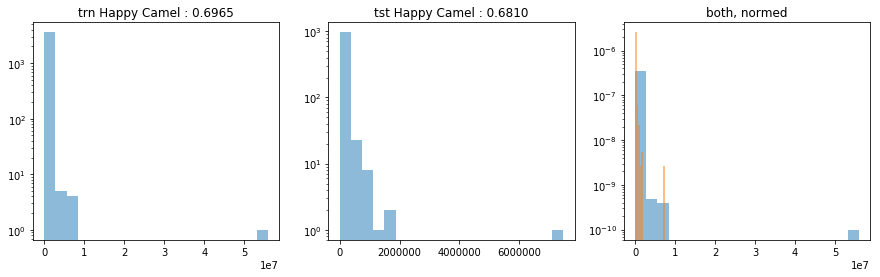

 ---------- Heavy, Heavier, Heaviest ---------- 


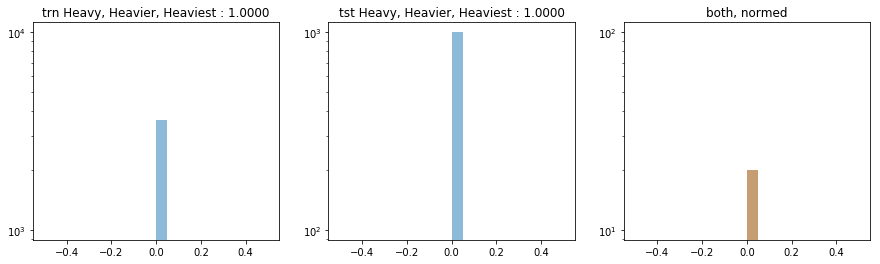

 ---------- Honey Cake ---------- 


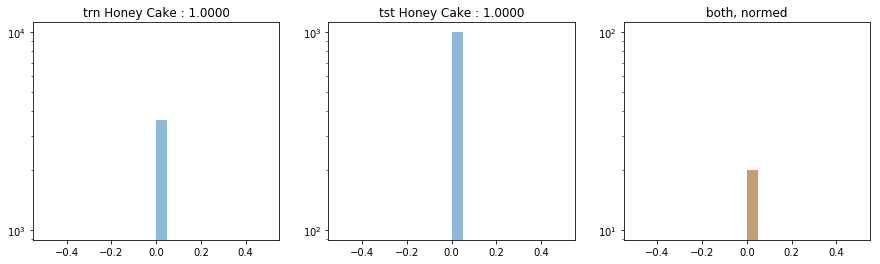

 ---------- Leaf Leader ---------- 


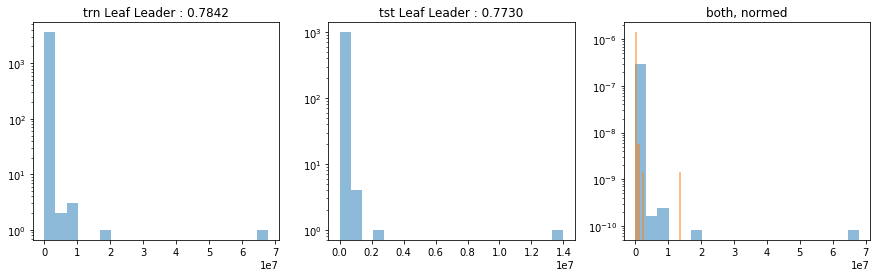

 ---------- Lifting Heavy Things ---------- 


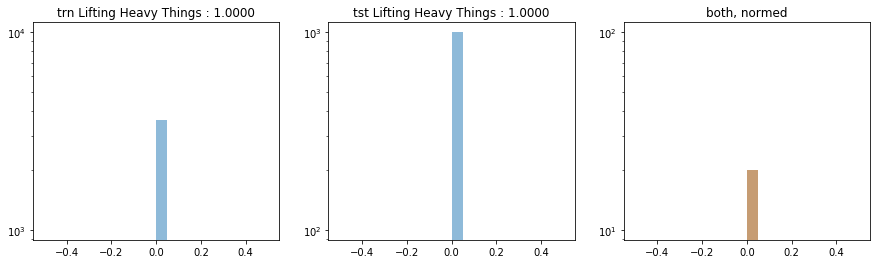

 ---------- Magma Peak - Level 1 ---------- 


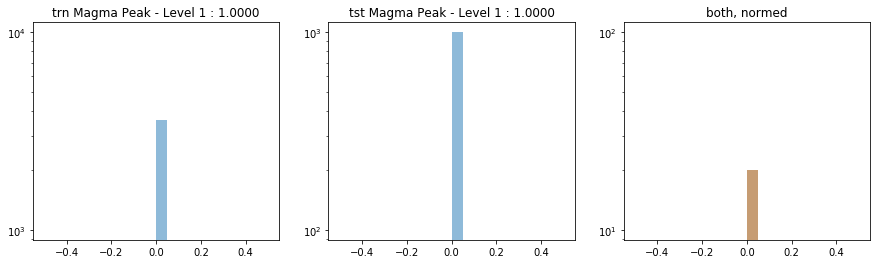

 ---------- Magma Peak - Level 2 ---------- 


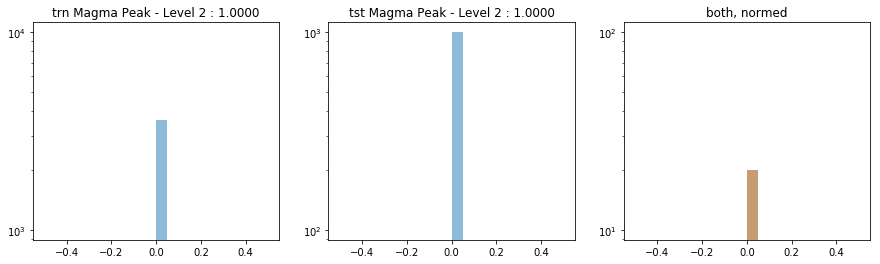

 ---------- Mushroom Sorter (Assessment) ---------- 


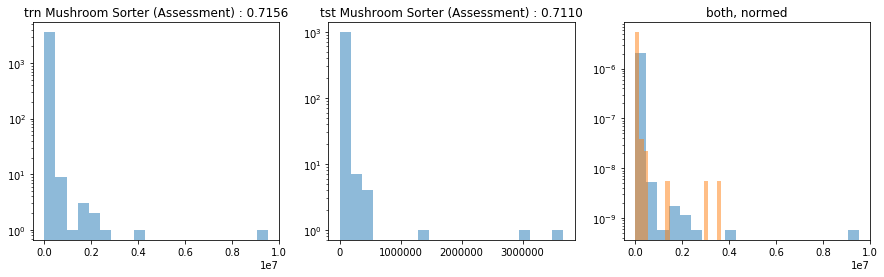

 ---------- Ordering Spheres ---------- 


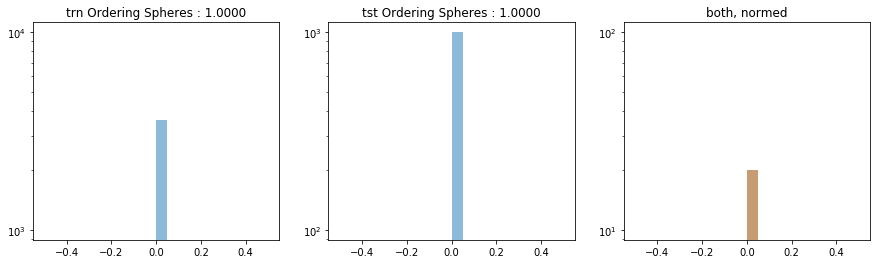

 ---------- Pan Balance ---------- 


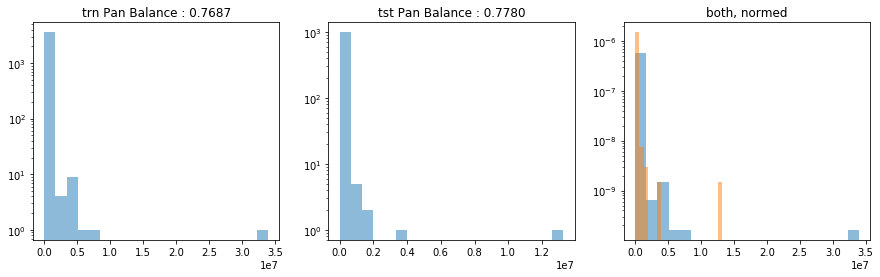

 ---------- Pirate's Tale ---------- 


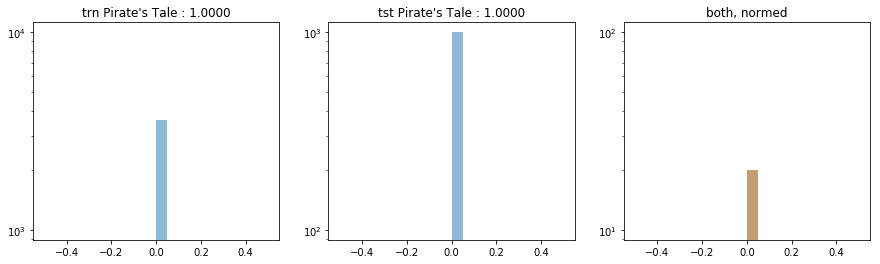

 ---------- Rulers ---------- 


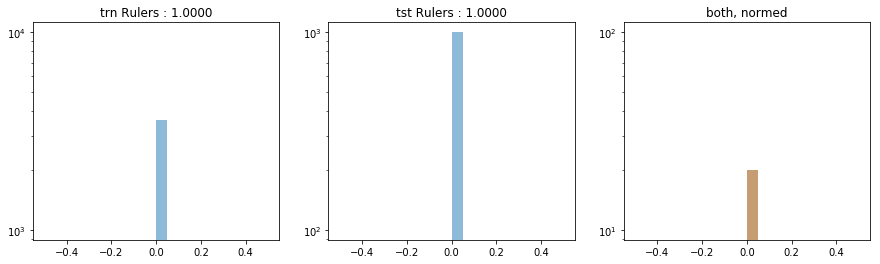

 ---------- Sandcastle Builder (Activity) ---------- 


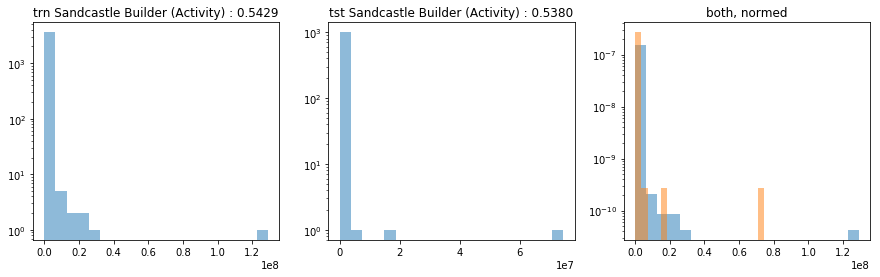

 ---------- Scrub-A-Dub ---------- 


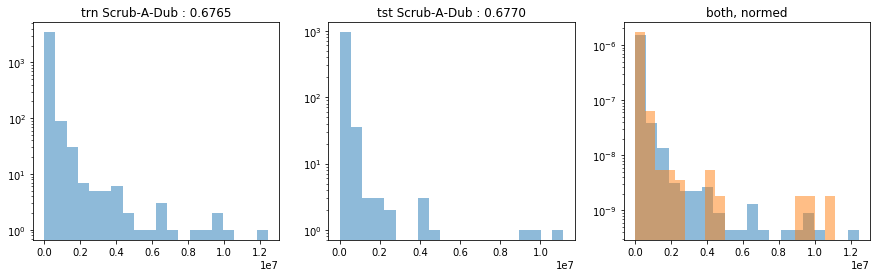

 ---------- Slop Problem ---------- 


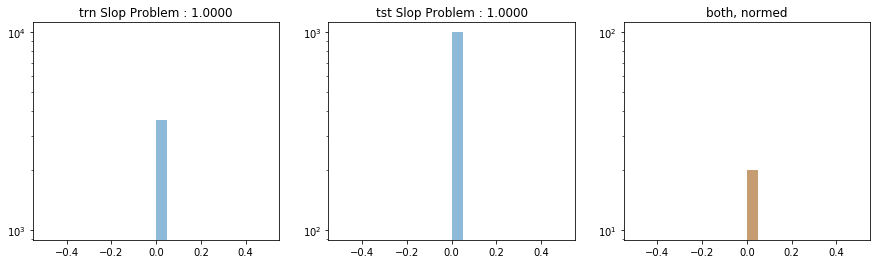

 ---------- Treasure Map ---------- 


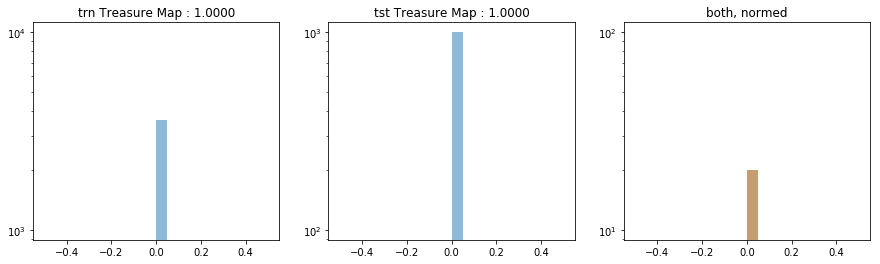

 ---------- Tree Top City - Level 1 ---------- 


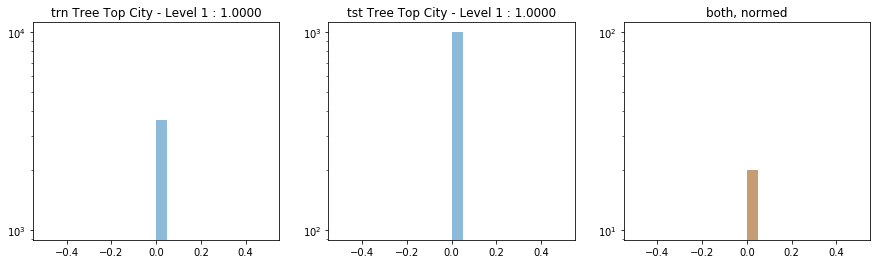

 ---------- Tree Top City - Level 2 ---------- 


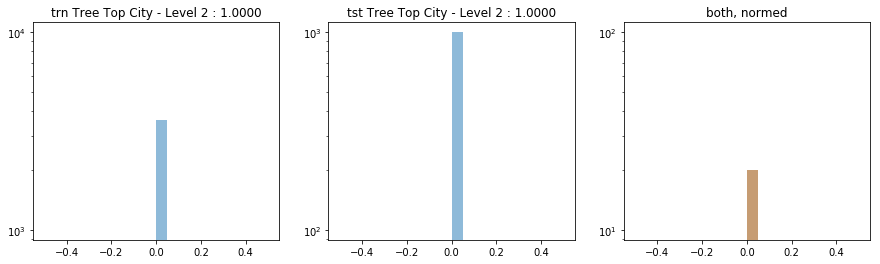

 ---------- Tree Top City - Level 3 ---------- 


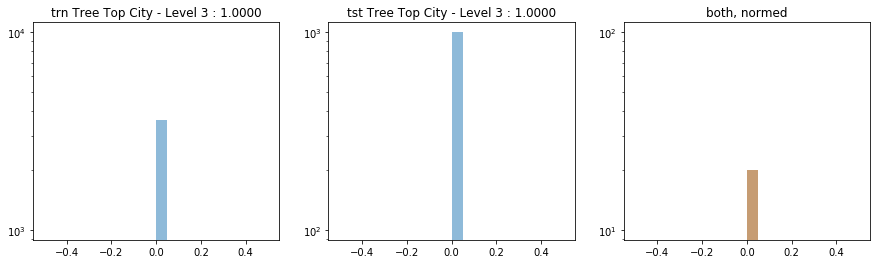

 ---------- Watering Hole (Activity) ---------- 


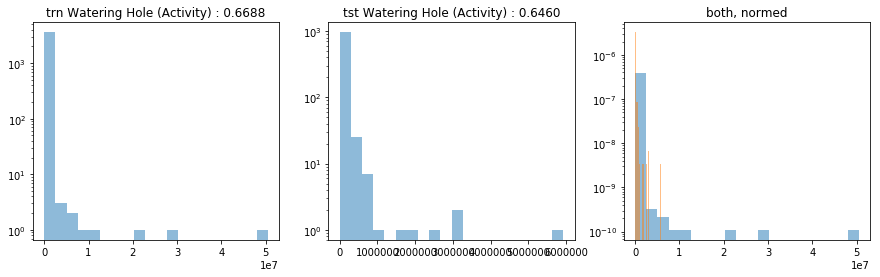

 ---------- Welcome to Lost Lagoon! ---------- 


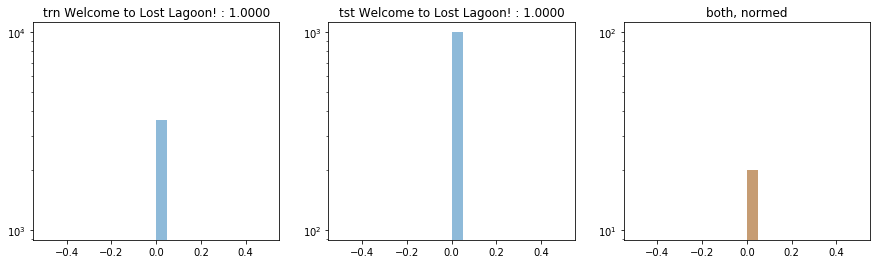

 ---------- accum_acc_gr_0 ---------- 


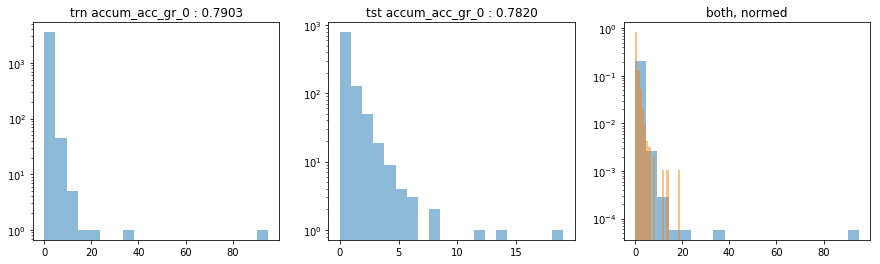

 ---------- accum_acc_gr_1 ---------- 


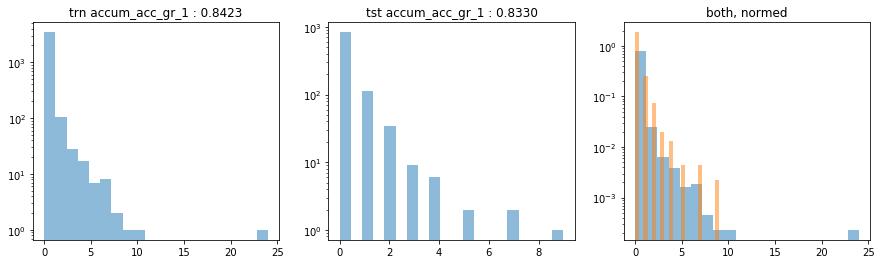

 ---------- accum_acc_gr_2 ---------- 


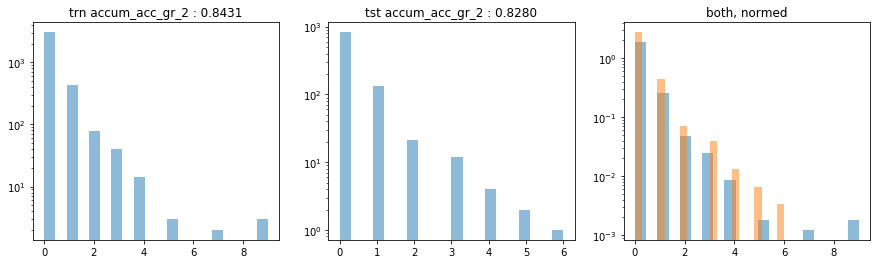

 ---------- accum_acc_gr_3 ---------- 


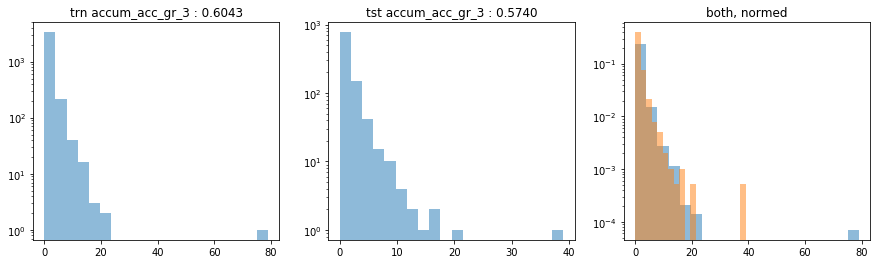

 ---------- cum_accuracy ---------- 


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


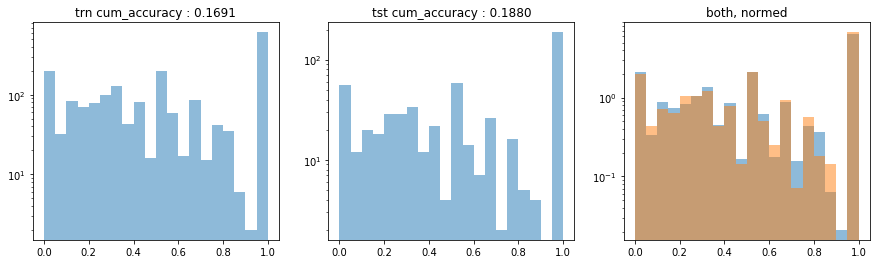

 ---------- prev_acc_gr_0 ---------- 


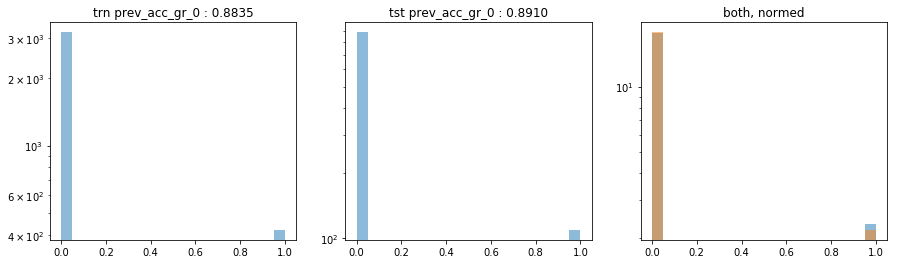

 ---------- prev_acc_gr_1 ---------- 


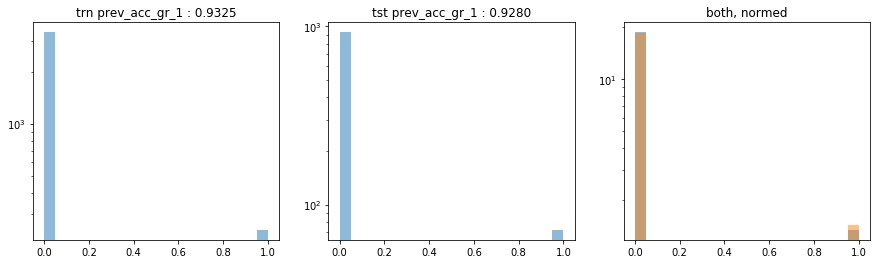

 ---------- prev_acc_gr_2 ---------- 


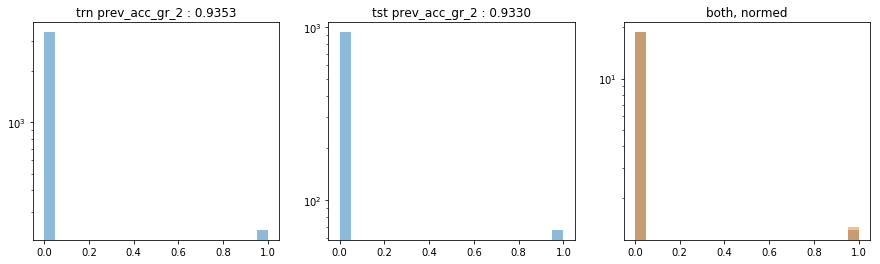

 ---------- prev_acc_gr_3 ---------- 


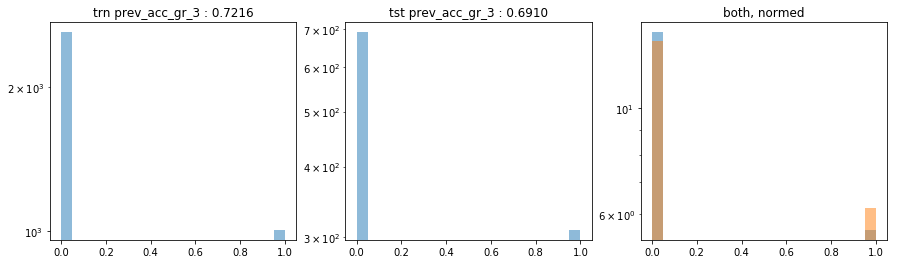

 ---------- prev_cumnum_c ---------- 


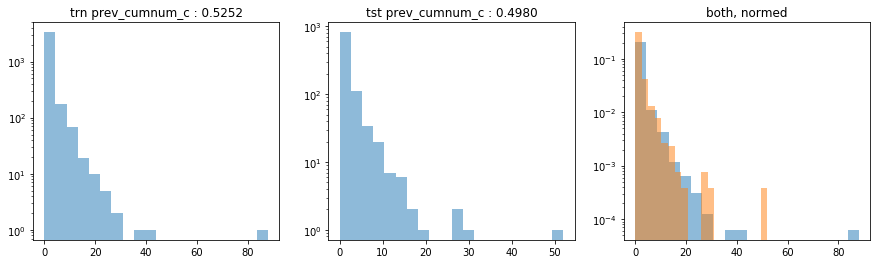

 ---------- prev_cumnum_inc ---------- 


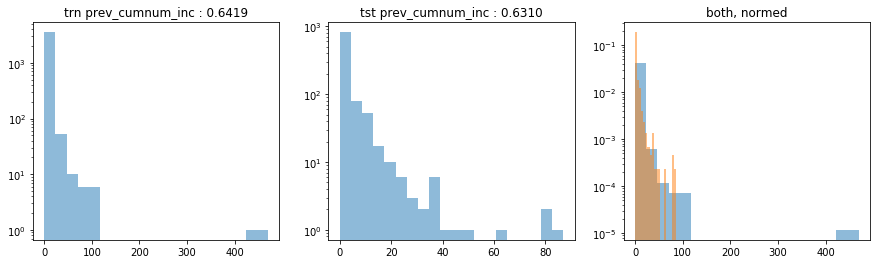

 ---------- prev_num_corrects ---------- 


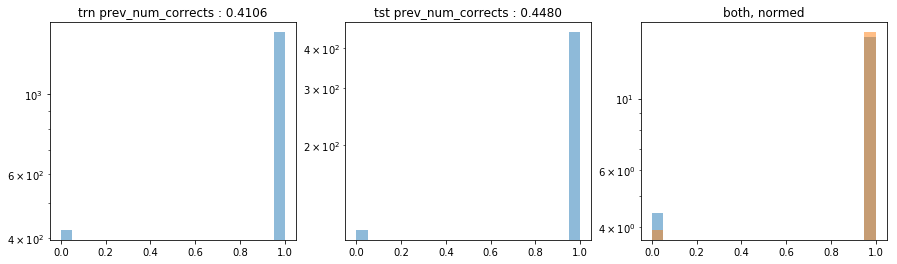

 ---------- prev_num_incorrects ---------- 


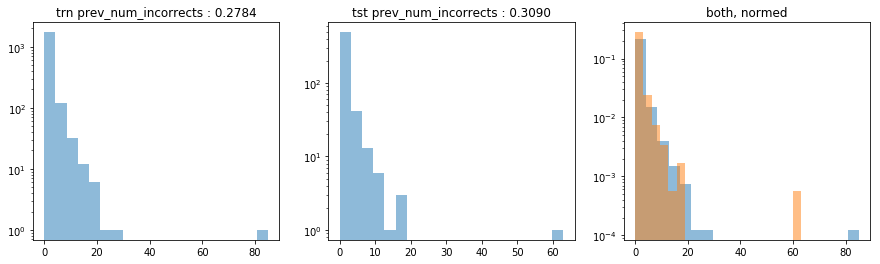

 ---------- f019_bef_target_cnt_x ---------- 


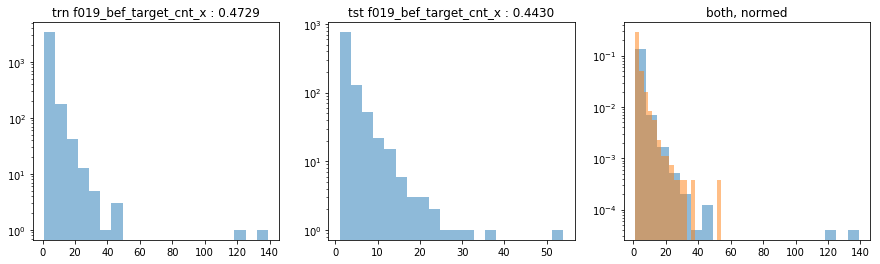

 ---------- f019_bef_target_cnt_y ---------- 


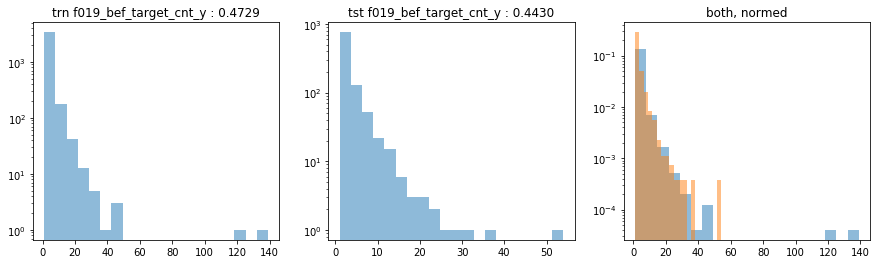

In [74]:
for col in tst_kb_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_kb_df[col], tst_kb_df[col])

#### Worldcount

In [63]:
trn_wc_df = pd.read_pickle('../mnt/inputs/features/train/Worldcount.pkl')
tst_wc_df = pd.read_pickle('../mnt/inputs/features/test/Worldcount.pkl')

trn_wc_df = trn_kb_df[['game_session']].merge(trn_wc_df, on=['game_session'], how='left')
tst_wc_df = tst_kb_df[['game_session']].merge(tst_wc_df, on=['game_session'], how='left')

 ---------- title_type_cnt_12 Monkeys_Clip ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


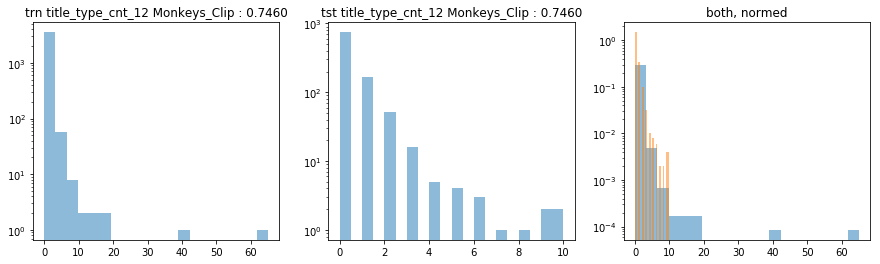

 ---------- title_type_cnt_Air Show_Game ---------- 


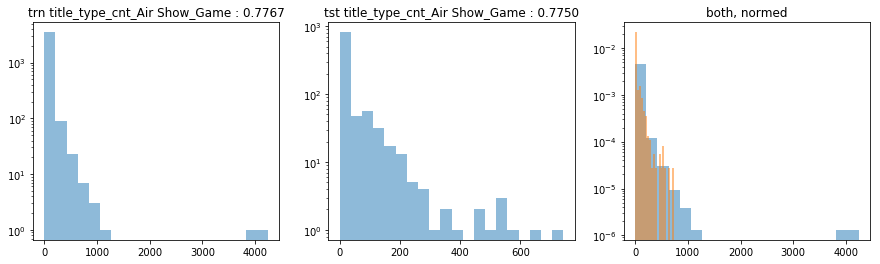

 ---------- title_type_cnt_All Star Sorting_Game ---------- 


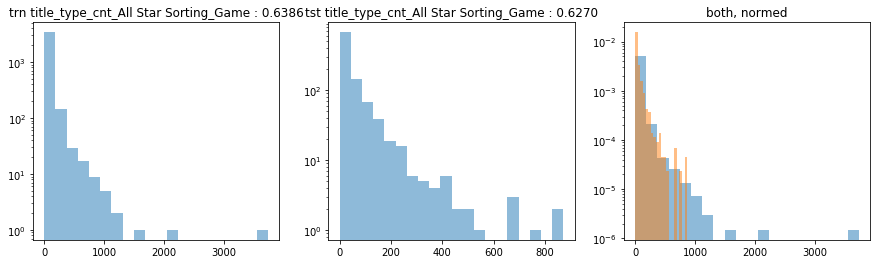

 ---------- title_type_cnt_Balancing Act_Clip ---------- 


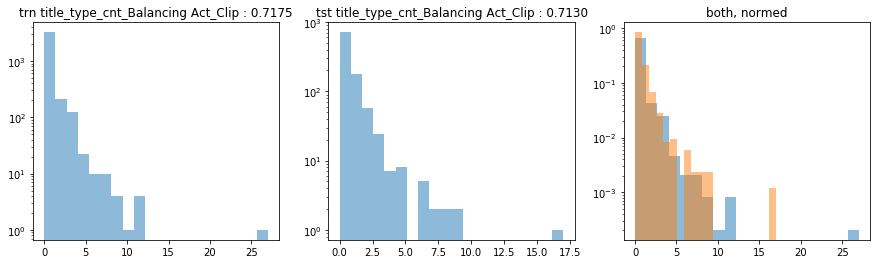

 ---------- title_type_cnt_Bird Measurer (Assessment)_Assessment ---------- 


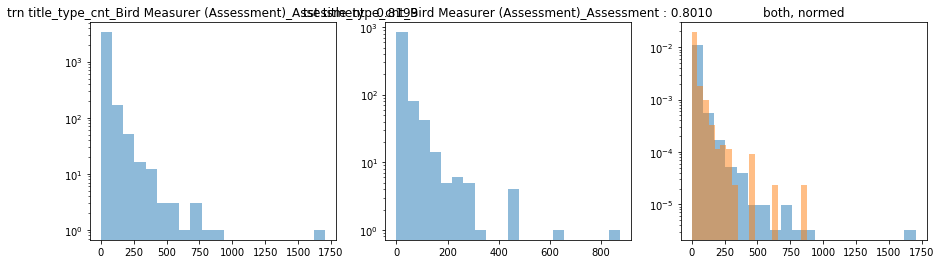

 ---------- title_type_cnt_Bottle Filler (Activity)_Activity ---------- 


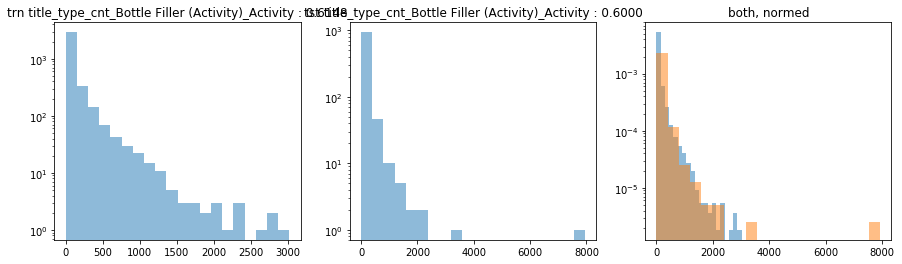

 ---------- title_type_cnt_Bubble Bath_Game ---------- 


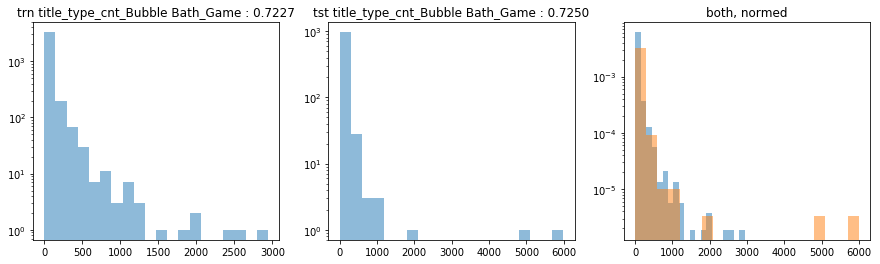

 ---------- title_type_cnt_Bug Measurer (Activity)_Activity ---------- 


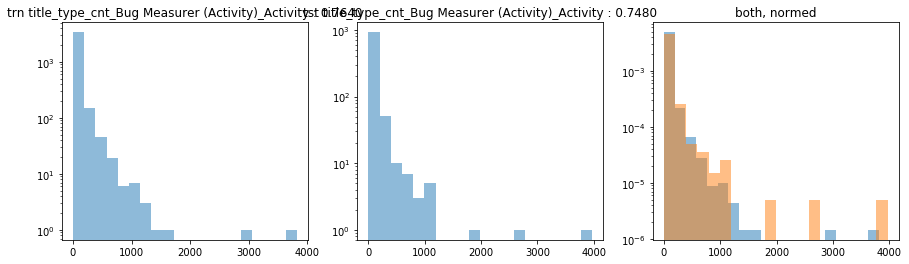

 ---------- title_type_cnt_Cart Balancer (Assessment)_Assessment ---------- 


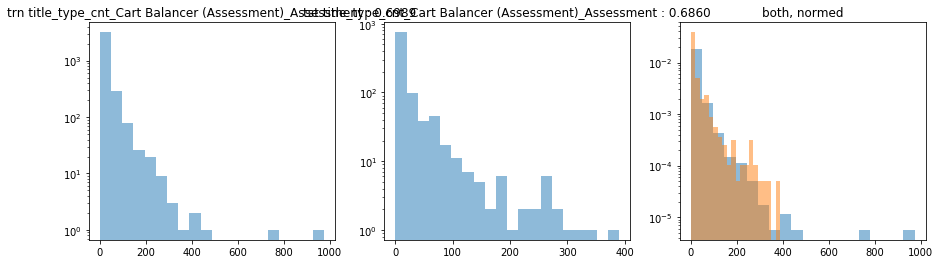

 ---------- title_type_cnt_Cauldron Filler (Assessment)_Assessment ---------- 


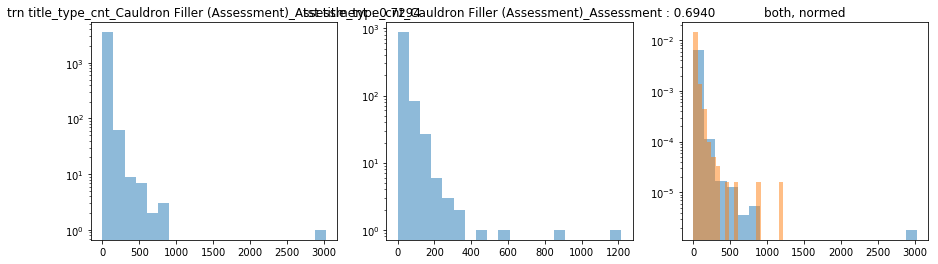

 ---------- title_type_cnt_Chest Sorter (Assessment)_Assessment ---------- 


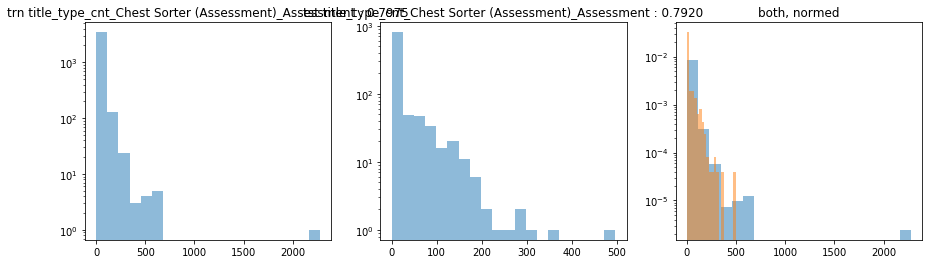

 ---------- title_type_cnt_Chicken Balancer (Activity)_Activity ---------- 


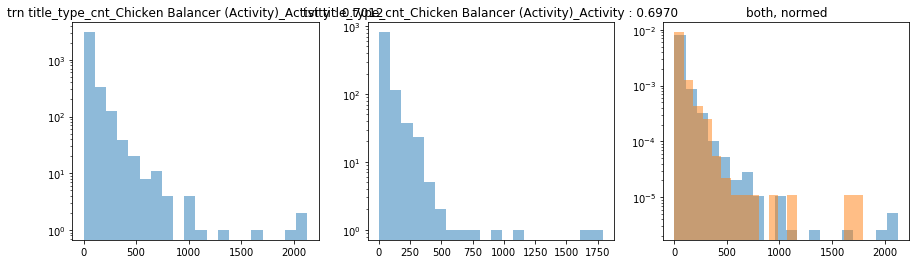

 ---------- title_type_cnt_Chow Time_Game ---------- 


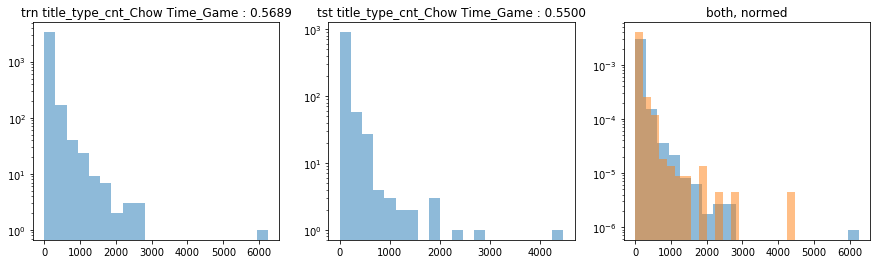

 ---------- title_type_cnt_Costume Box_Clip ---------- 


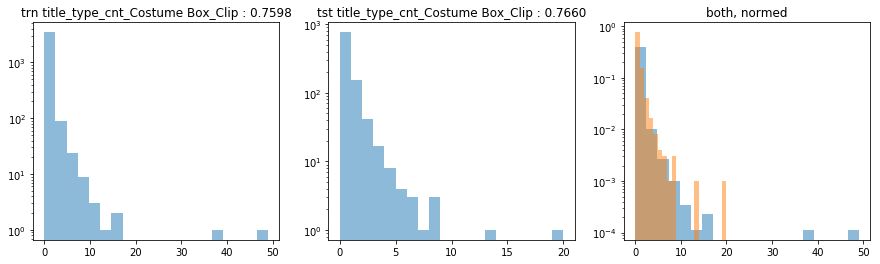

 ---------- title_type_cnt_Crystal Caves - Level 1_Clip ---------- 


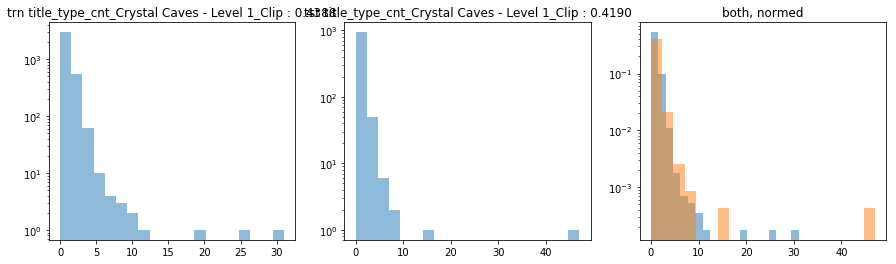

 ---------- title_type_cnt_Crystal Caves - Level 2_Clip ---------- 


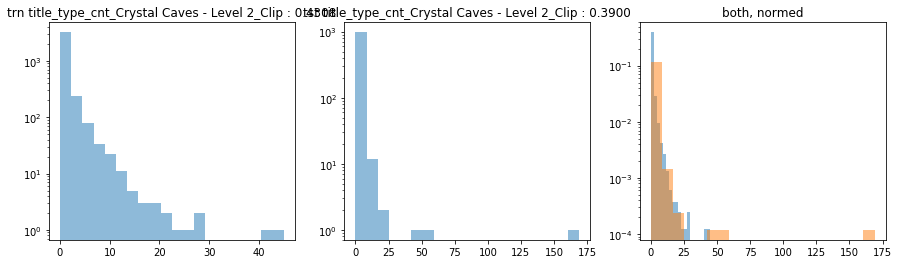

 ---------- title_type_cnt_Crystal Caves - Level 3_Clip ---------- 


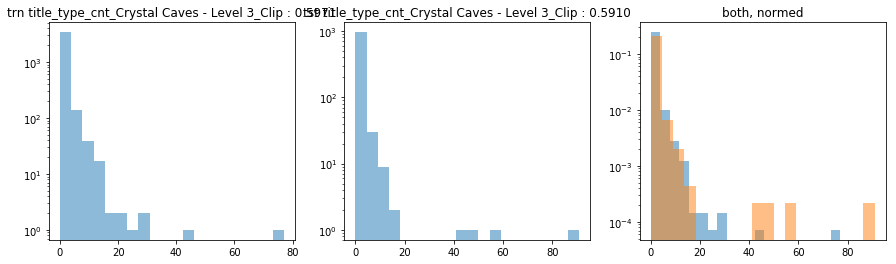

 ---------- title_type_cnt_Crystals Rule_Game ---------- 


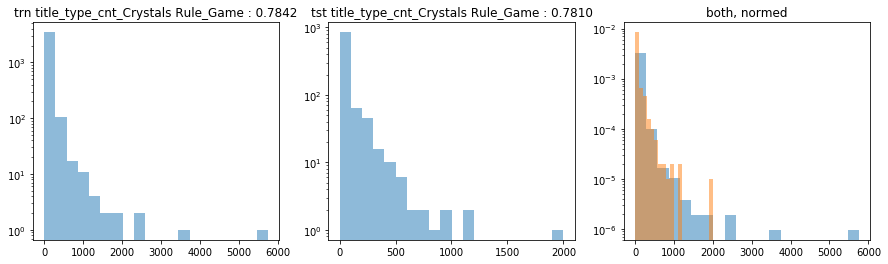

 ---------- title_type_cnt_Dino Dive_Game ---------- 


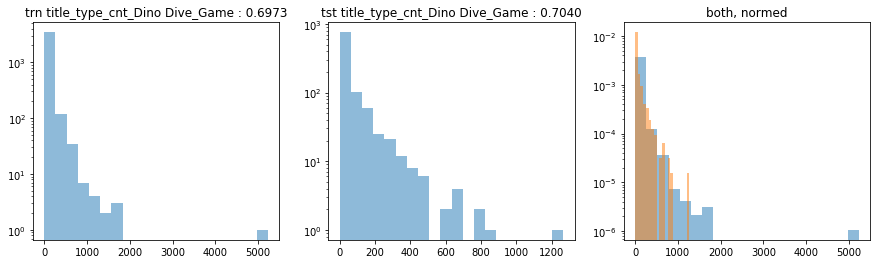

 ---------- title_type_cnt_Dino Drink_Game ---------- 


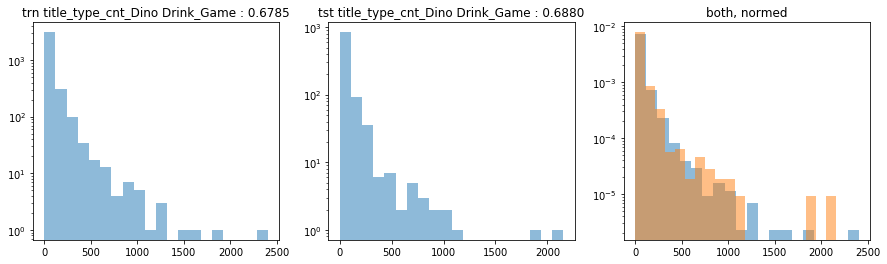

 ---------- title_type_cnt_Egg Dropper (Activity)_Activity ---------- 


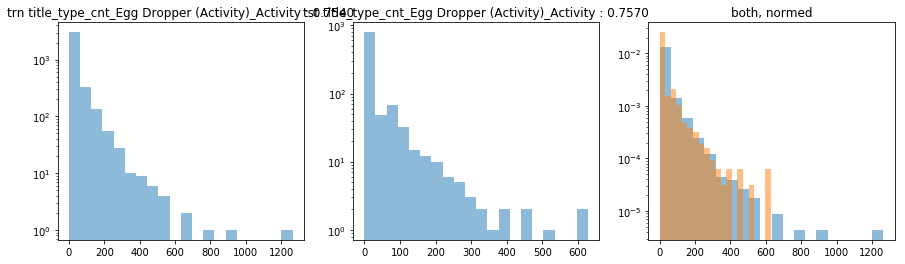

 ---------- title_type_cnt_Fireworks (Activity)_Activity ---------- 


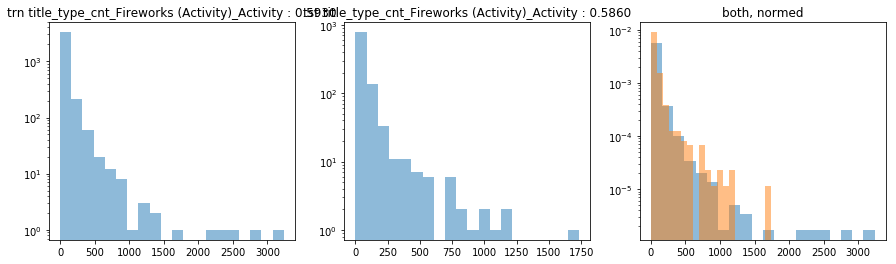

 ---------- title_type_cnt_Flower Waterer (Activity)_Activity ---------- 


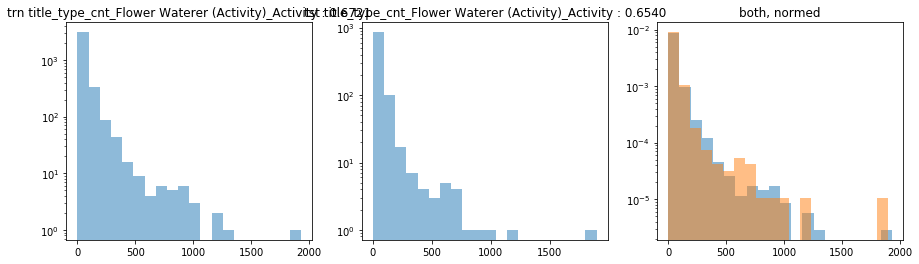

 ---------- title_type_cnt_Happy Camel_Game ---------- 


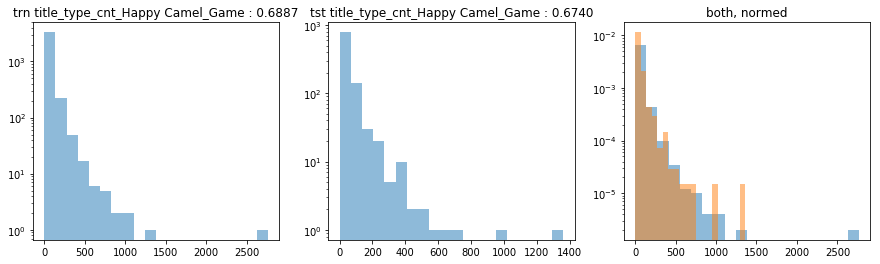

 ---------- title_type_cnt_Heavy, Heavier, Heaviest_Clip ---------- 


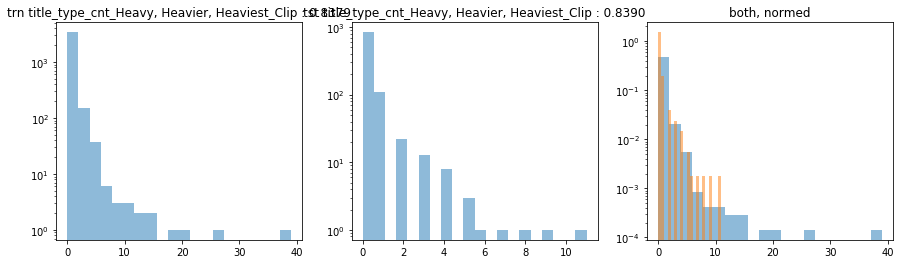

 ---------- title_type_cnt_Honey Cake_Clip ---------- 


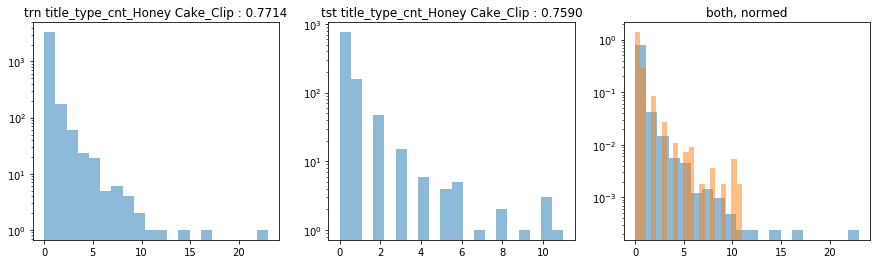

 ---------- title_type_cnt_Leaf Leader_Game ---------- 


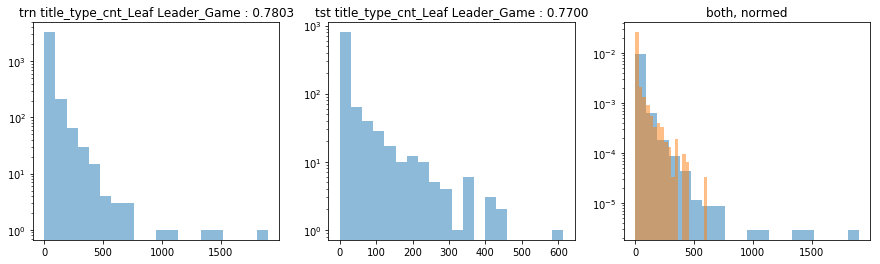

 ---------- title_type_cnt_Lifting Heavy Things_Clip ---------- 


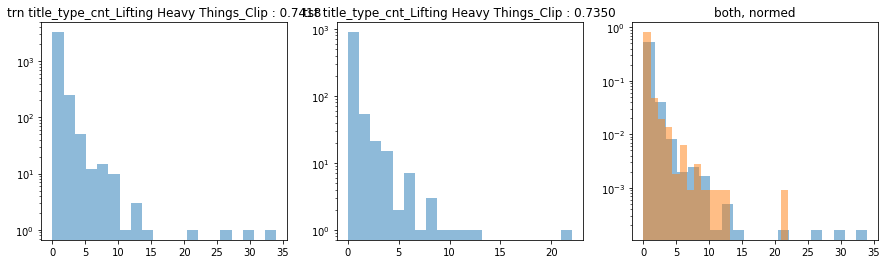

 ---------- title_type_cnt_Magma Peak - Level 1_Clip ---------- 


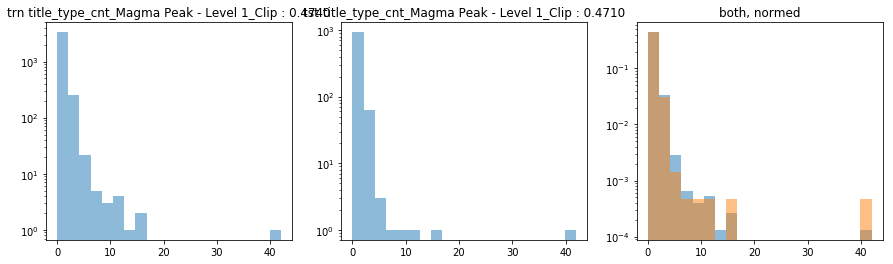

 ---------- title_type_cnt_Magma Peak - Level 2_Clip ---------- 


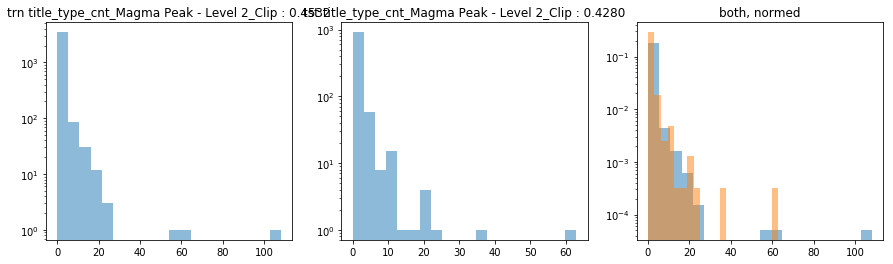

 ---------- title_type_cnt_Mushroom Sorter (Assessment)_Assessment ---------- 


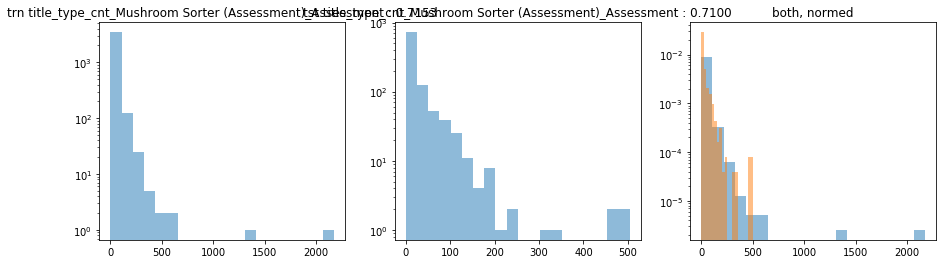

 ---------- title_type_cnt_Ordering Spheres_Clip ---------- 


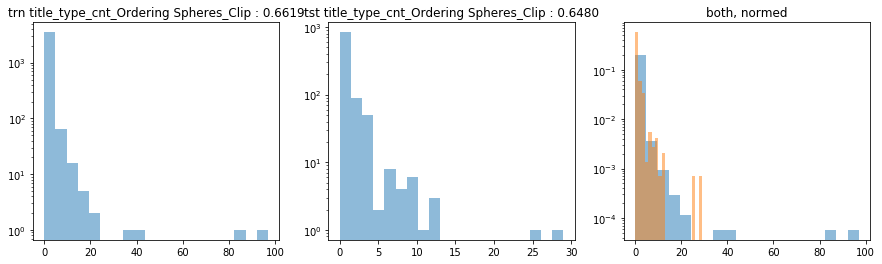

 ---------- title_type_cnt_Pan Balance_Game ---------- 


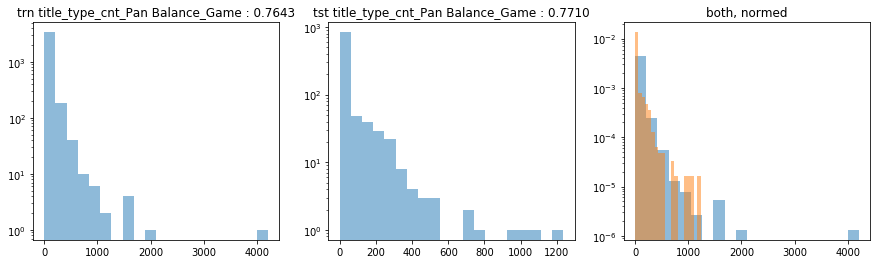

 ---------- title_type_cnt_Pirate's Tale_Clip ---------- 


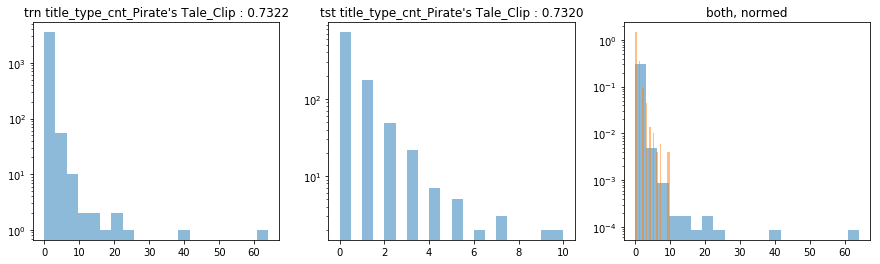

 ---------- title_type_cnt_Rulers_Clip ---------- 


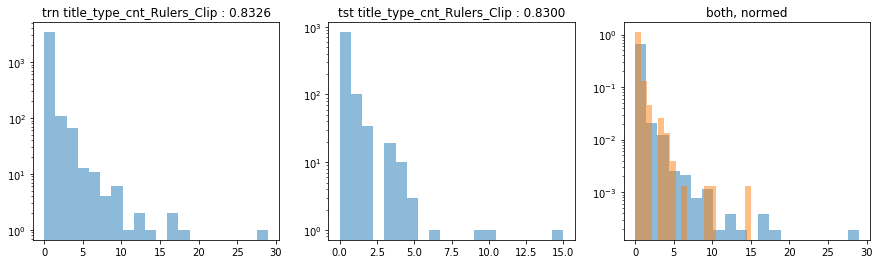

 ---------- title_type_cnt_Sandcastle Builder (Activity)_Activity ---------- 


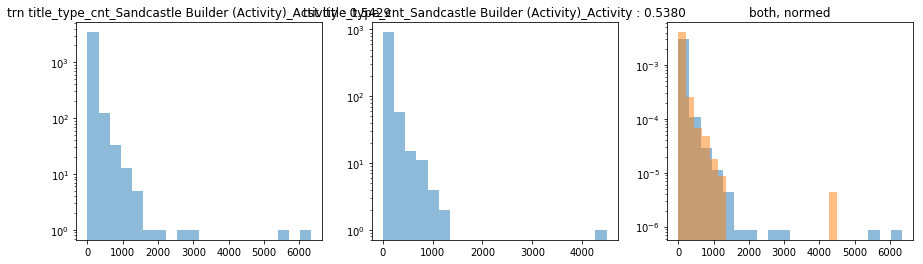

 ---------- title_type_cnt_Scrub-A-Dub_Game ---------- 


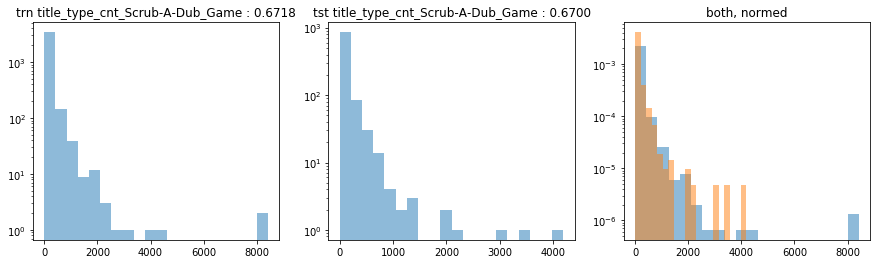

 ---------- title_type_cnt_Slop Problem_Clip ---------- 


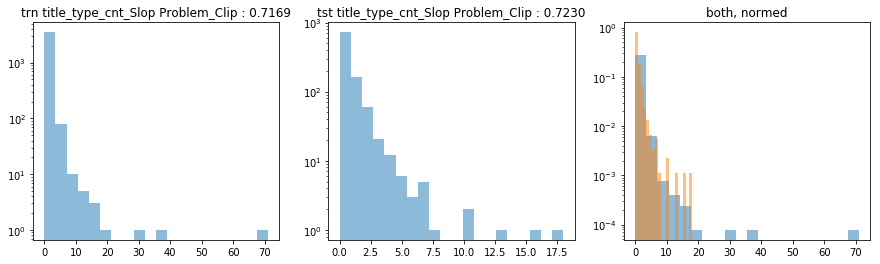

 ---------- title_type_cnt_Treasure Map_Clip ---------- 


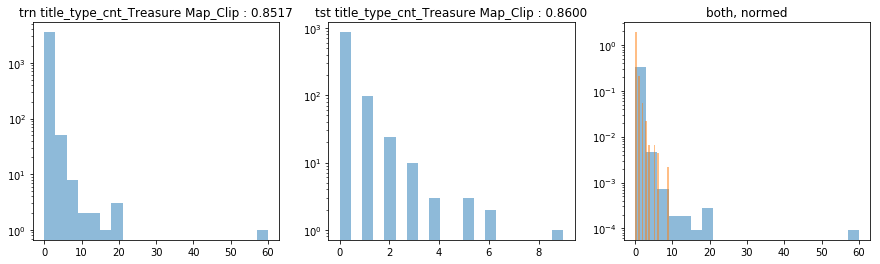

 ---------- title_type_cnt_Tree Top City - Level 1_Clip ---------- 


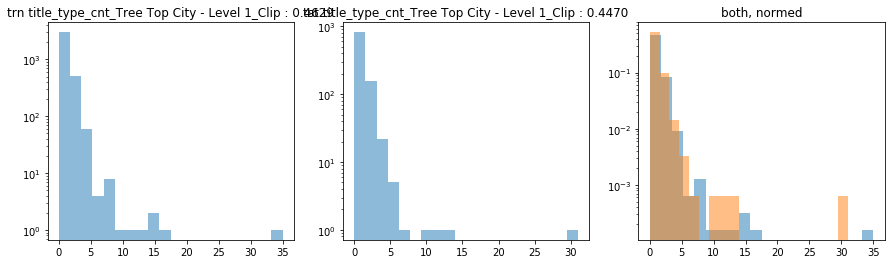

 ---------- title_type_cnt_Tree Top City - Level 2_Clip ---------- 


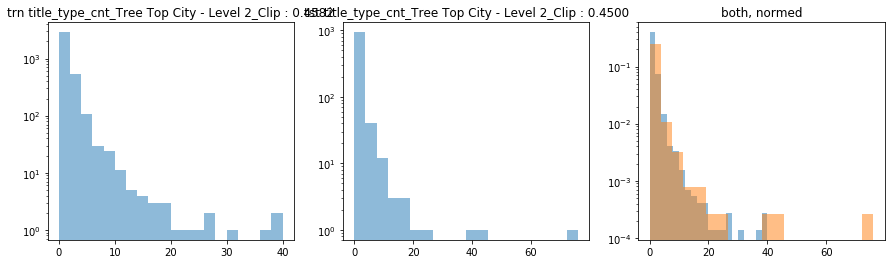

 ---------- title_type_cnt_Tree Top City - Level 3_Clip ---------- 


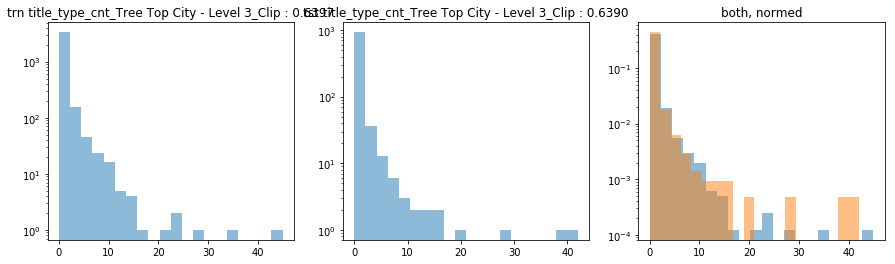

 ---------- title_type_cnt_Watering Hole (Activity)_Activity ---------- 


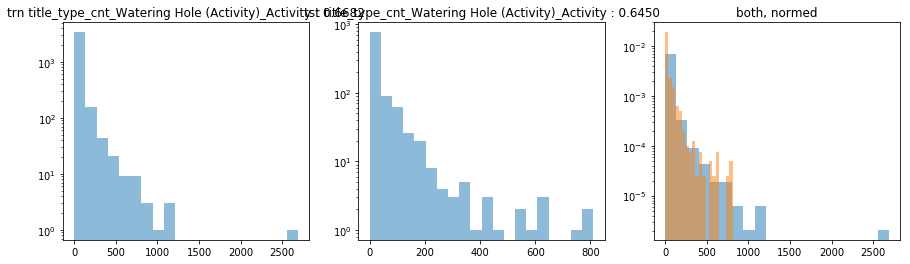

 ---------- title_type_cnt_Welcome to Lost Lagoon!_Clip ---------- 


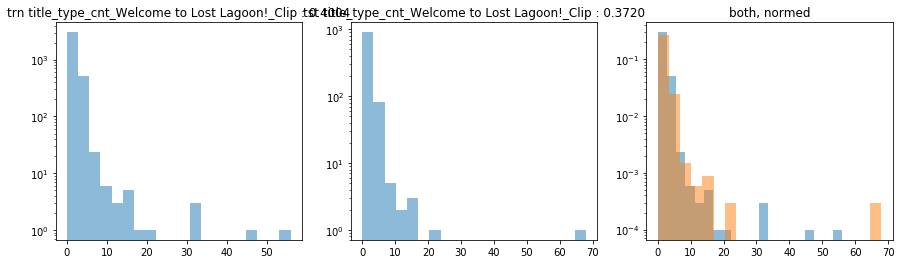

 ---------- wrd_cnt_CRYSTALCAVES ---------- 


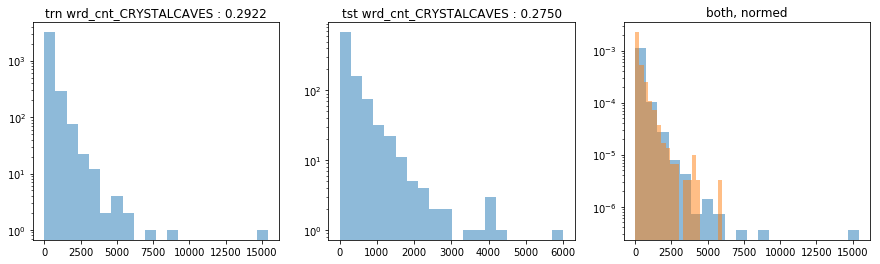

 ---------- wrd_cnt_MAGMAPEAK ---------- 


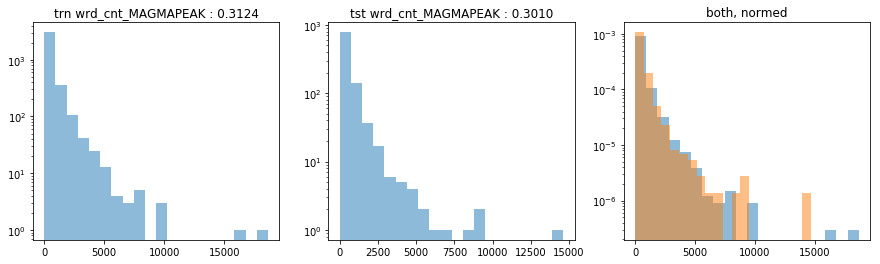

 ---------- wrd_cnt_NONE ---------- 


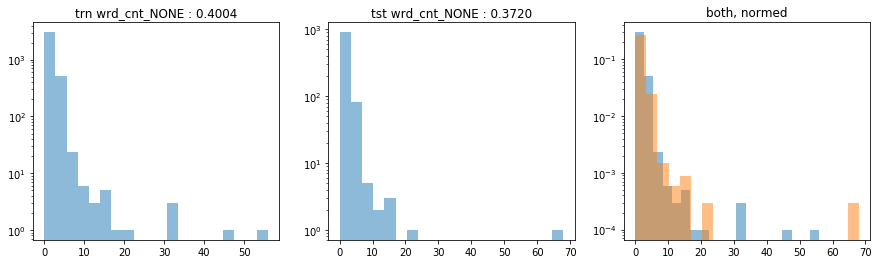

 ---------- wrd_cnt_TREETOPCITY ---------- 


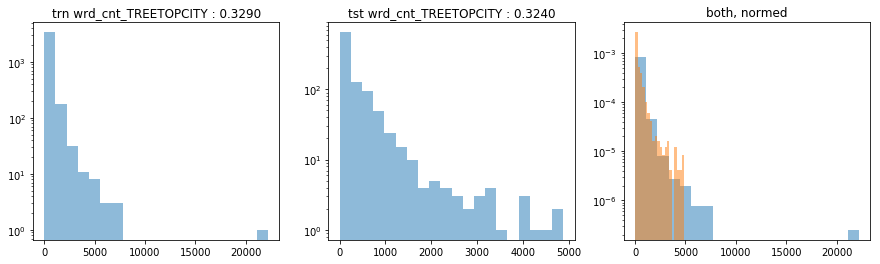

 ---------- wrd_type_cnt_CRYSTALCAVES_Activity ---------- 


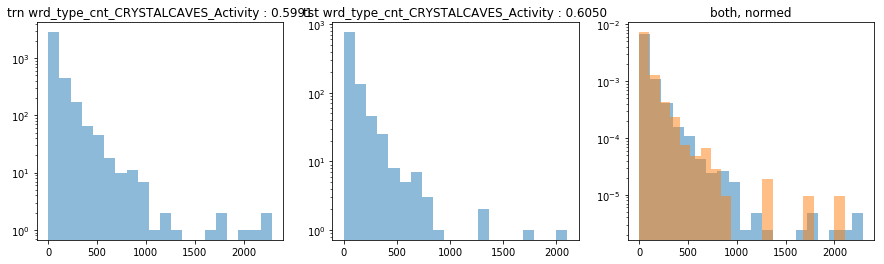

 ---------- wrd_type_cnt_CRYSTALCAVES_Assessment ---------- 


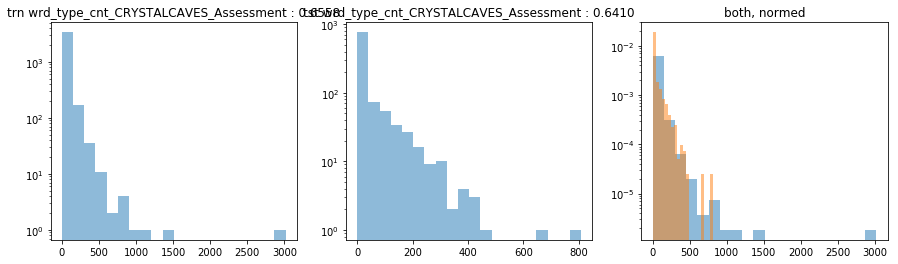

 ---------- wrd_type_cnt_CRYSTALCAVES_Clip ---------- 


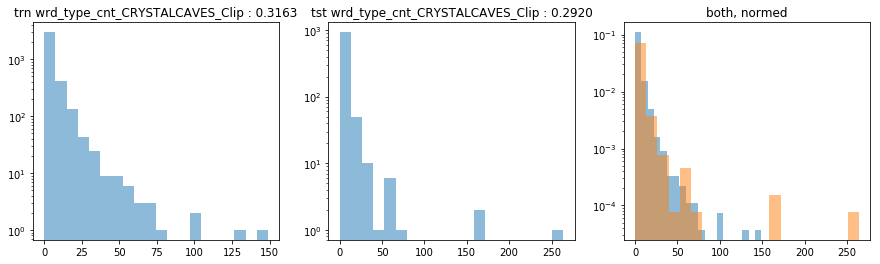

 ---------- wrd_type_cnt_CRYSTALCAVES_Game ---------- 


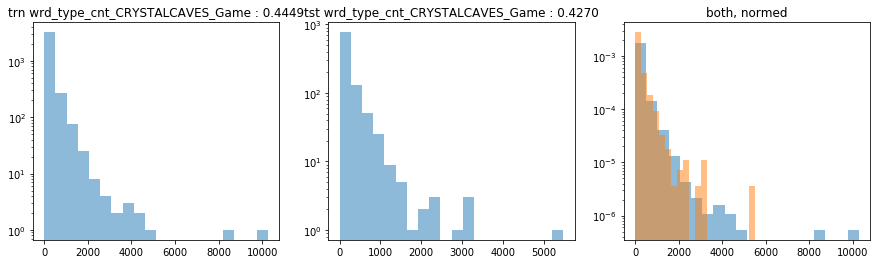

 ---------- wrd_type_cnt_MAGMAPEAK_Activity ---------- 


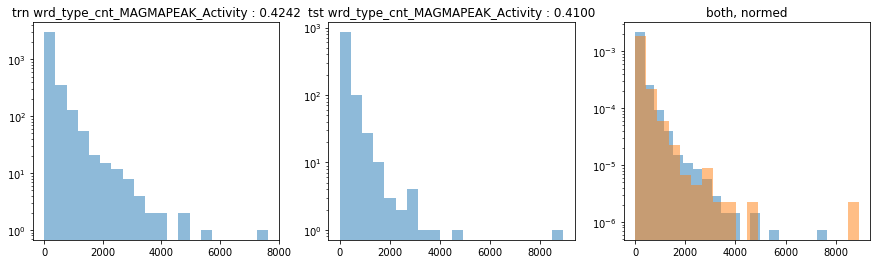

 ---------- wrd_type_cnt_MAGMAPEAK_Assessment ---------- 


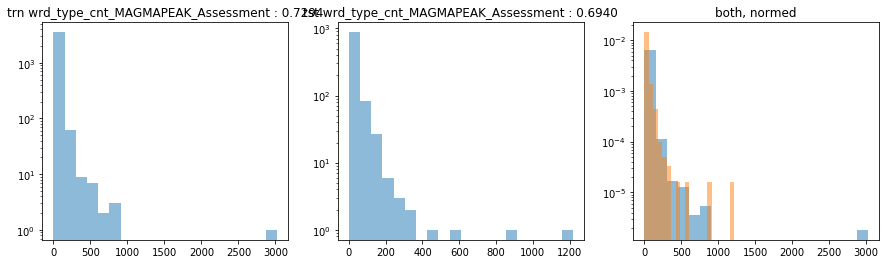

 ---------- wrd_type_cnt_MAGMAPEAK_Clip ---------- 


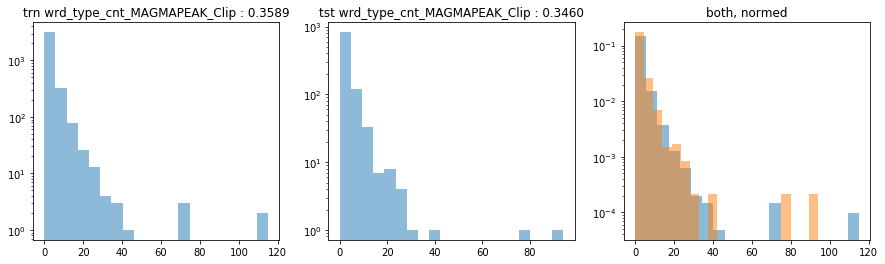

 ---------- wrd_type_cnt_MAGMAPEAK_Game ---------- 


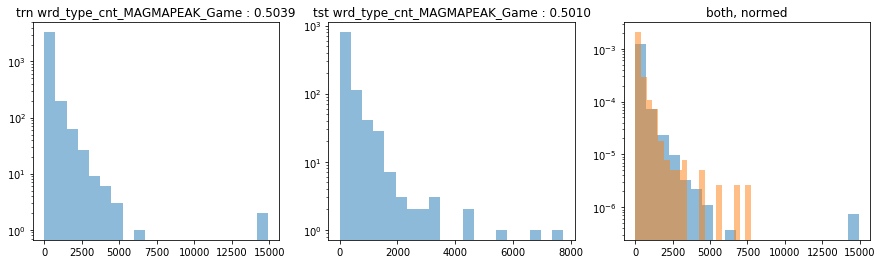

 ---------- wrd_type_cnt_NONE_Clip ---------- 


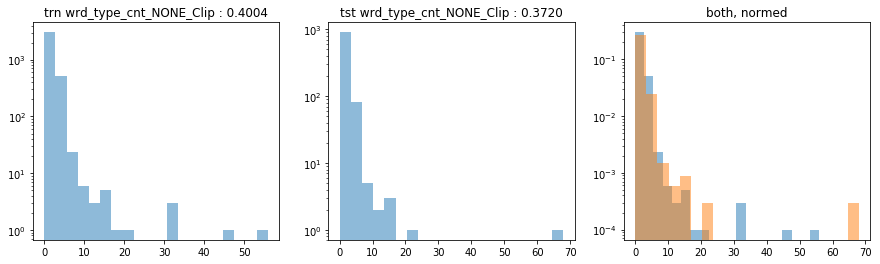

 ---------- wrd_type_cnt_TREETOPCITY_Activity ---------- 


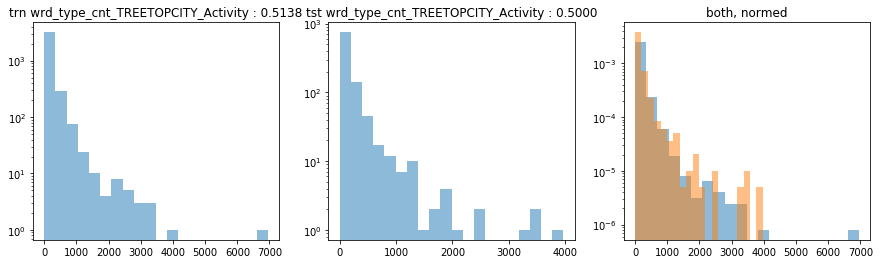

 ---------- wrd_type_cnt_TREETOPCITY_Assessment ---------- 


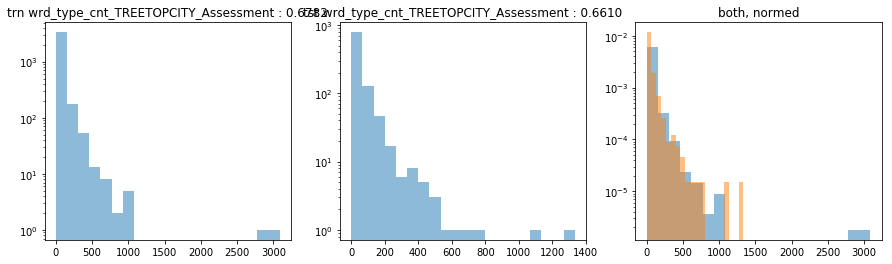

 ---------- wrd_type_cnt_TREETOPCITY_Clip ---------- 


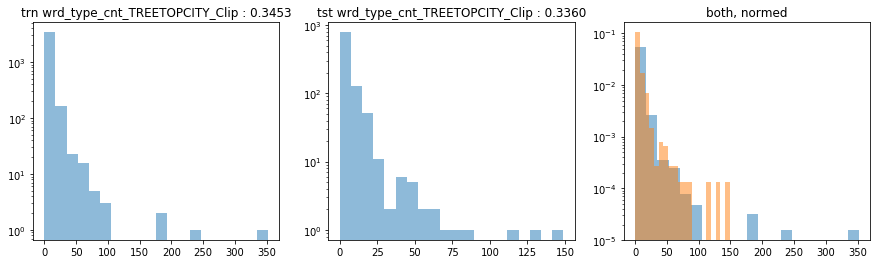

 ---------- wrd_type_cnt_TREETOPCITY_Game ---------- 


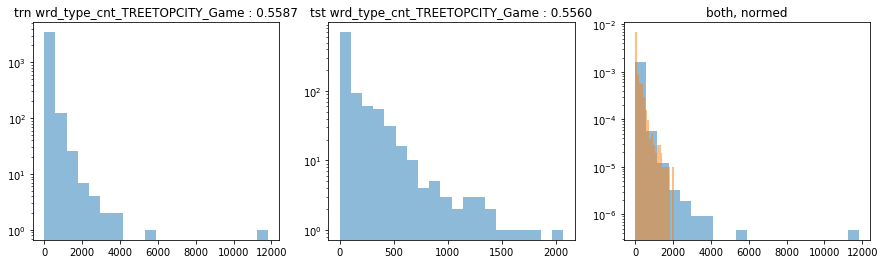

In [64]:
for col in tst_wc_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_wc_df[col], tst_wc_df[col])

#### EncodingTitles

In [66]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/EncodingTitles.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/EncodingTitles.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- title_enc ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


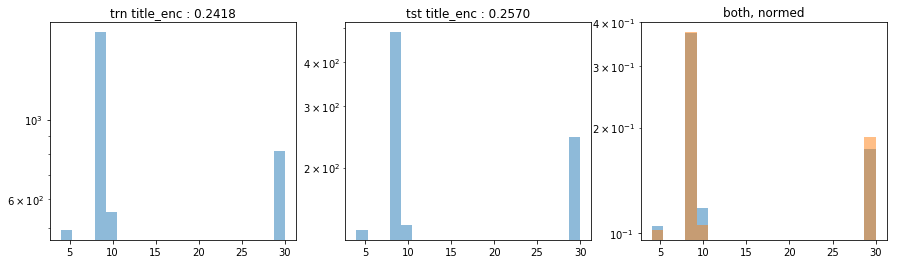

In [67]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### PrevAssessAcc

In [68]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/PrevAssessAcc.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/PrevAssessAcc.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- num_correct ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


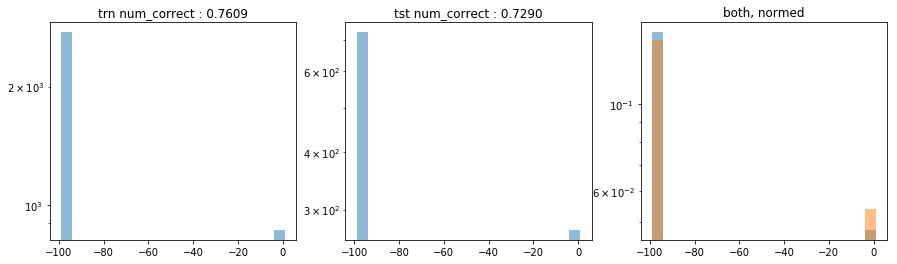

 ---------- num_incorrect ---------- 


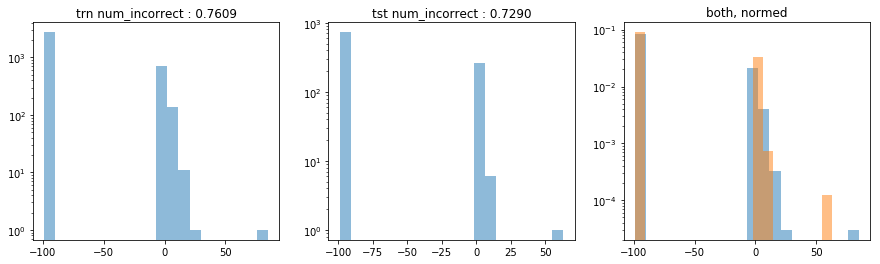

 ---------- as_acc_c_num ---------- 


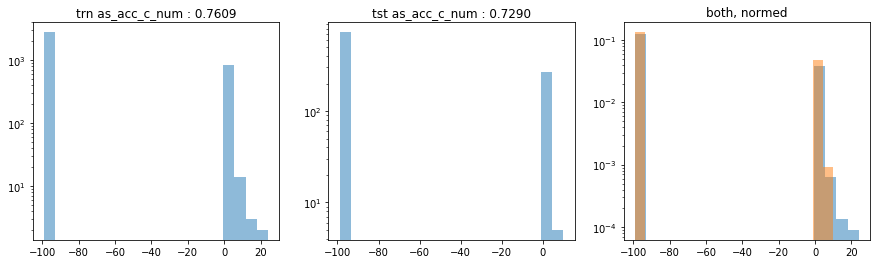

 ---------- as_acc_inc_num ---------- 


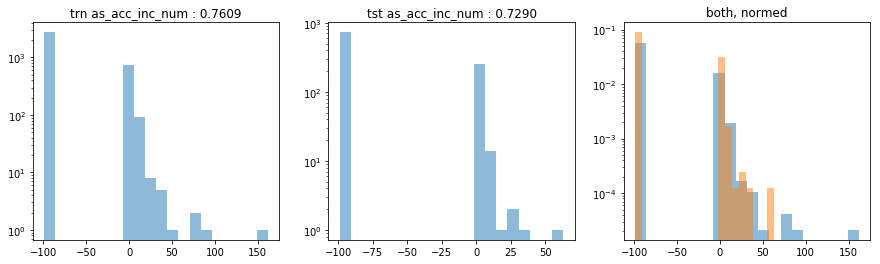

 ---------- as_prev_acc ---------- 


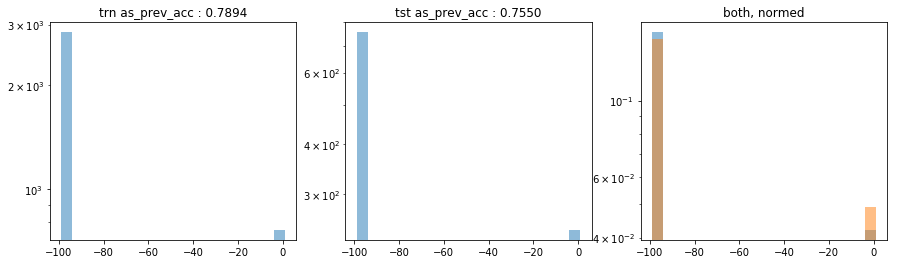

 ---------- as_cum_acc ---------- 


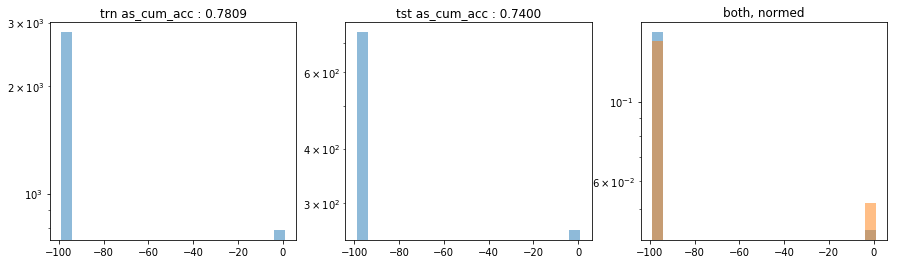

In [69]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### PrevAssessAccByTitle

In [71]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/PrevAssessAccByTitle.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/PrevAssessAccByTitle.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- cum_acc_cum_Bird Measurer (Assessment) ---------- 


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


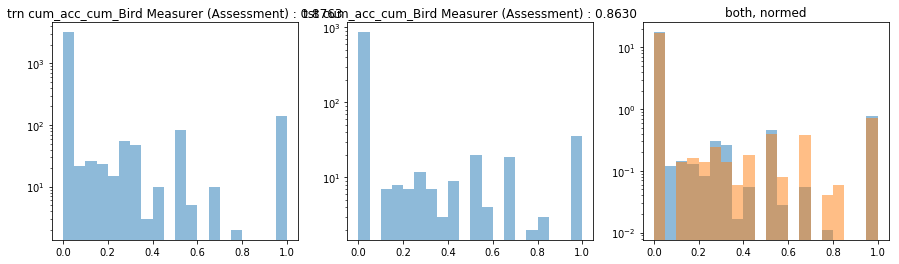

 ---------- cum_acc_cum_Cart Balancer (Assessment) ---------- 


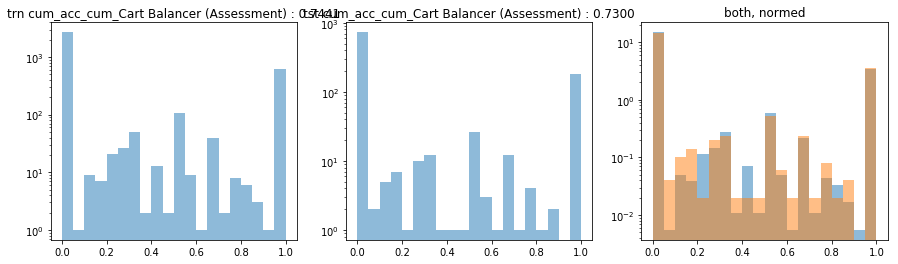

 ---------- cum_acc_cum_Cauldron Filler (Assessment) ---------- 


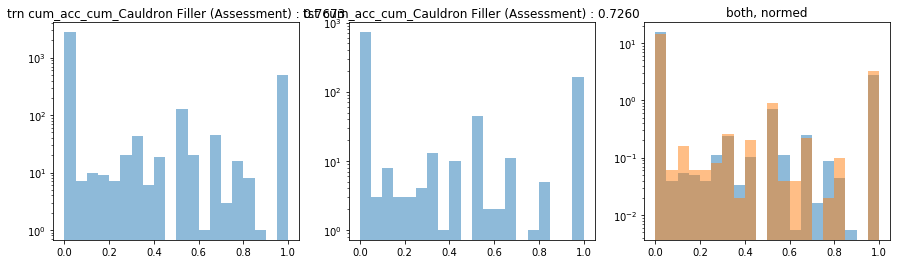

 ---------- cum_acc_cum_Chest Sorter (Assessment) ---------- 


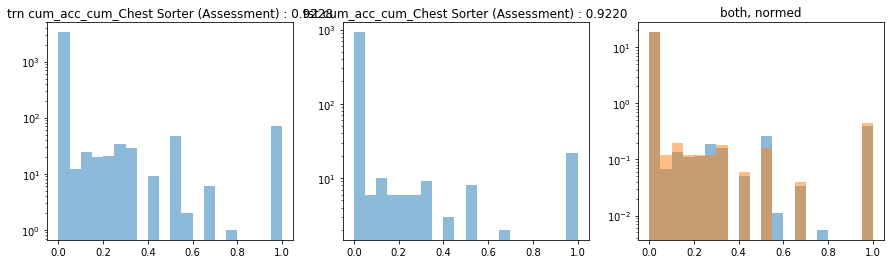

 ---------- cum_acc_cum_Mushroom Sorter (Assessment) ---------- 


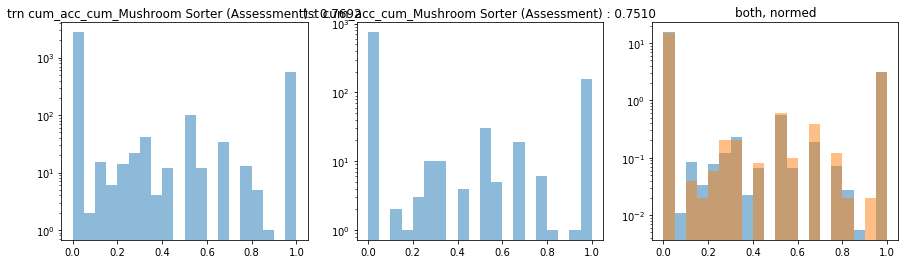

 ---------- cum_num_correct_Bird Measurer (Assessment) ---------- 


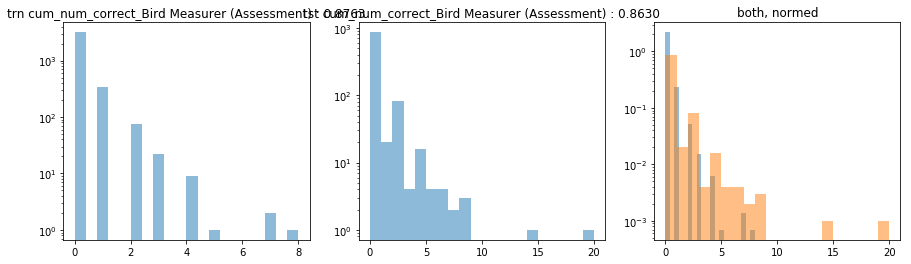

 ---------- cum_num_correct_Cart Balancer (Assessment) ---------- 


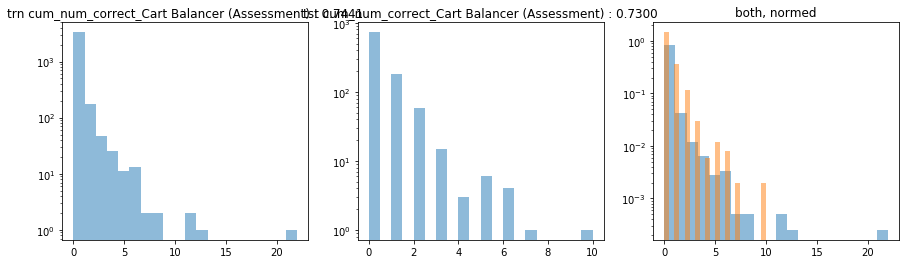

 ---------- cum_num_correct_Cauldron Filler (Assessment) ---------- 


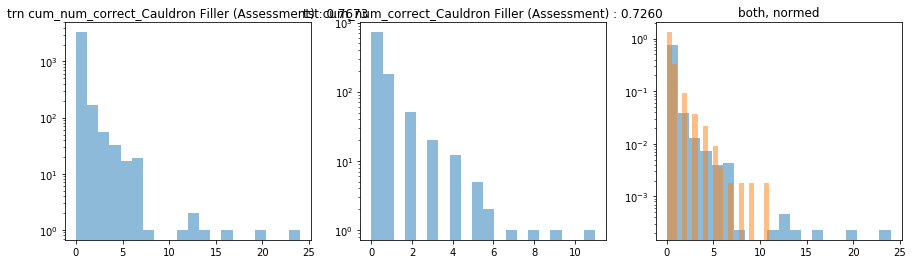

 ---------- cum_num_correct_Chest Sorter (Assessment) ---------- 


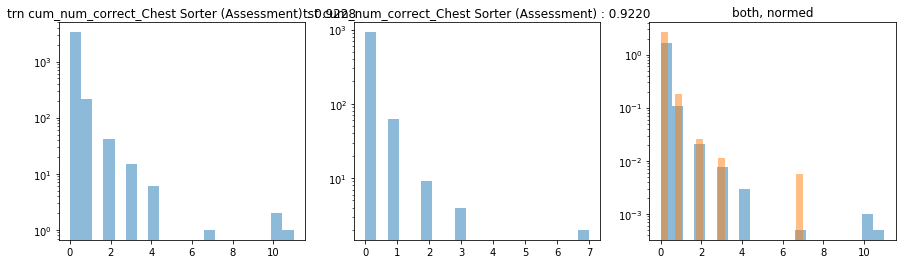

 ---------- cum_num_correct_Mushroom Sorter (Assessment) ---------- 


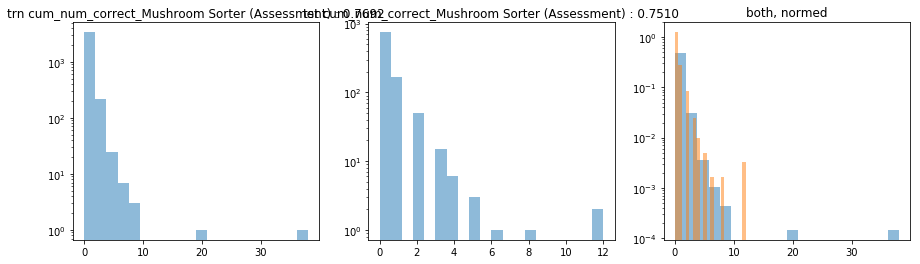

 ---------- cum_num_incorrect_Bird Measurer (Assessment) ---------- 


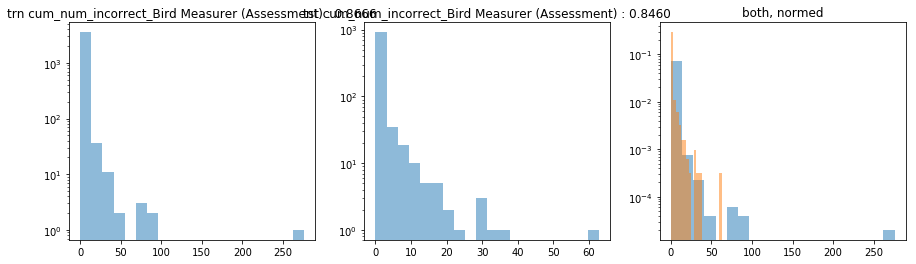

 ---------- cum_num_incorrect_Cart Balancer (Assessment) ---------- 


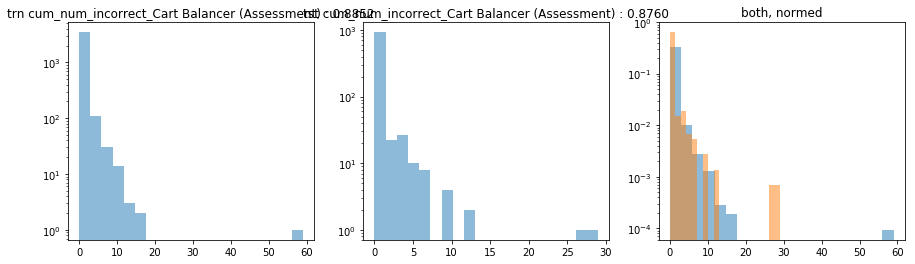

 ---------- cum_num_incorrect_Cauldron Filler (Assessment) ---------- 


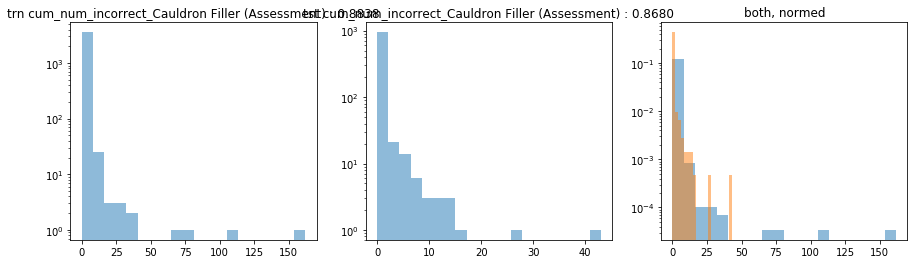

 ---------- cum_num_incorrect_Chest Sorter (Assessment) ---------- 


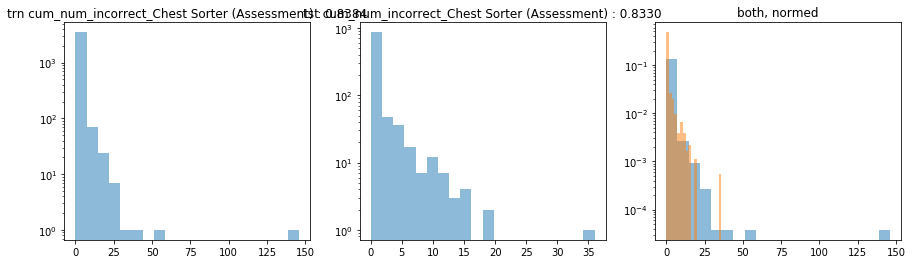

 ---------- cum_num_incorrect_Mushroom Sorter (Assessment) ---------- 


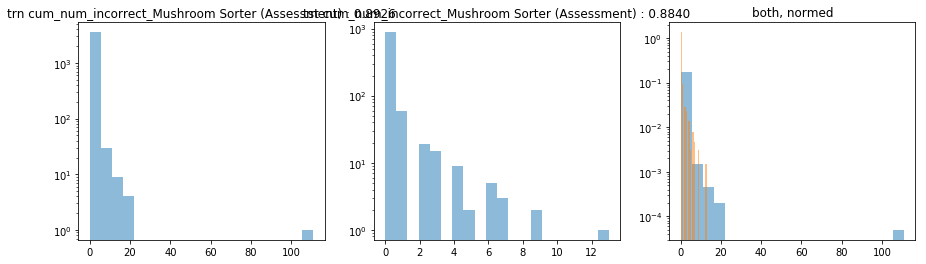

 ---------- num_correct_Bird Measurer (Assessment) ---------- 


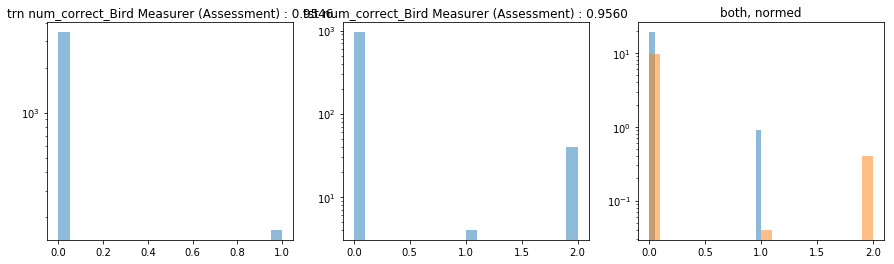

 ---------- num_correct_Cart Balancer (Assessment) ---------- 


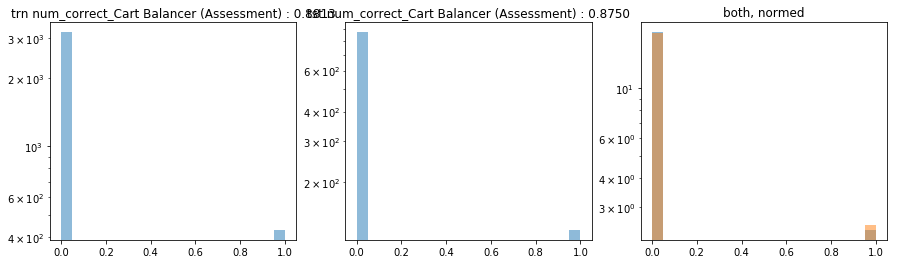

 ---------- num_correct_Cauldron Filler (Assessment) ---------- 


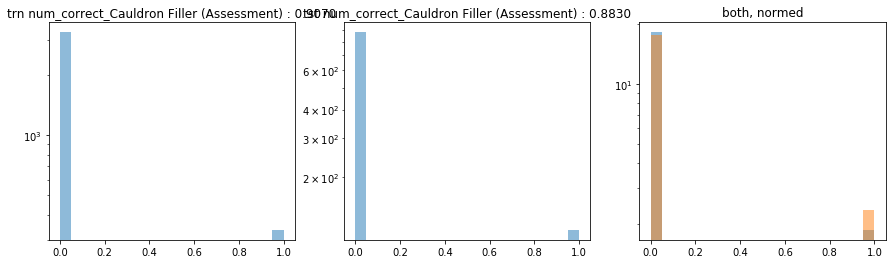

 ---------- num_correct_Chest Sorter (Assessment) ---------- 


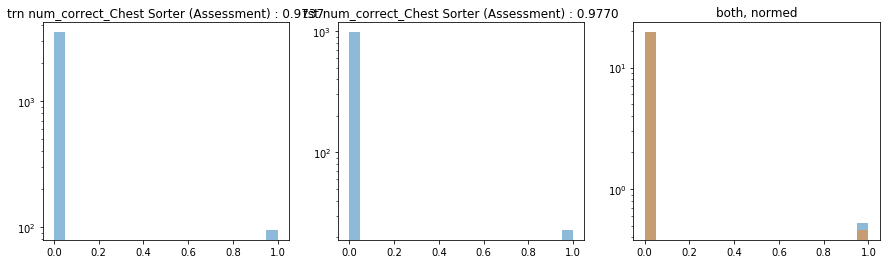

 ---------- num_correct_Mushroom Sorter (Assessment) ---------- 


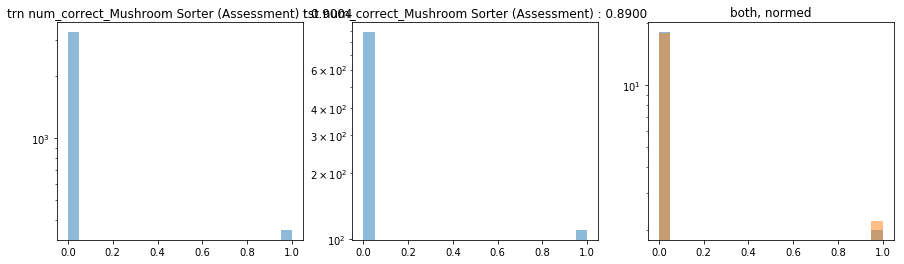

 ---------- num_incorrect_Bird Measurer (Assessment) ---------- 


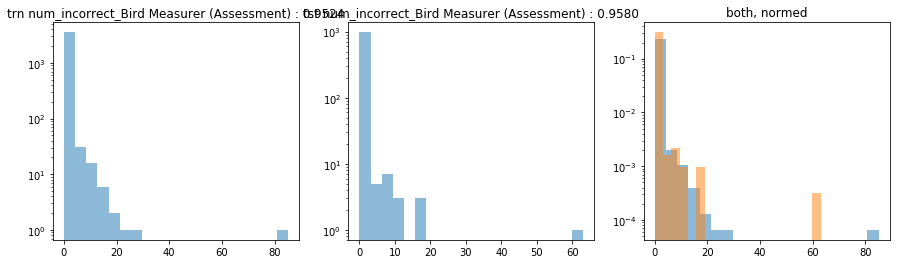

 ---------- num_incorrect_Cart Balancer (Assessment) ---------- 


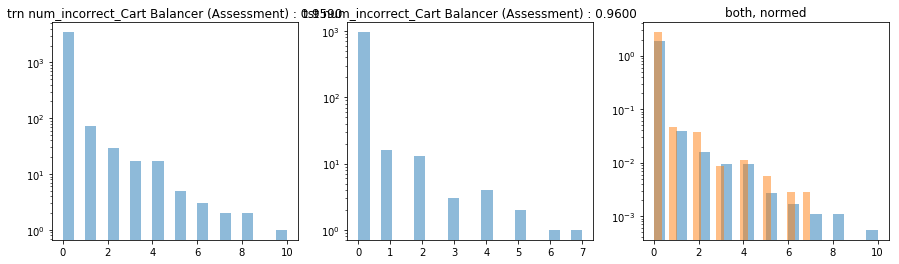

 ---------- num_incorrect_Cauldron Filler (Assessment) ---------- 


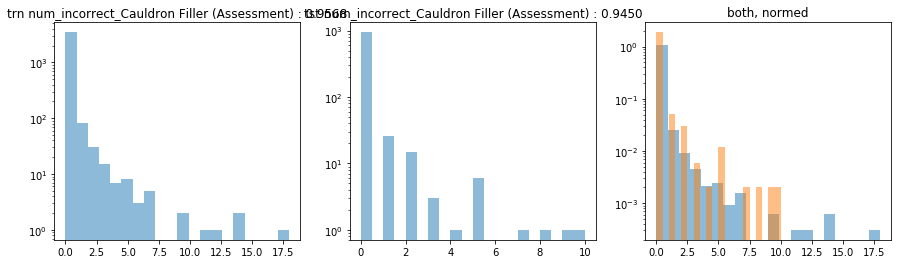

 ---------- num_incorrect_Chest Sorter (Assessment) ---------- 


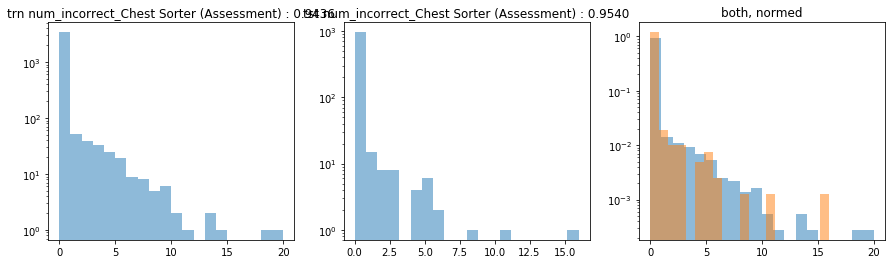

 ---------- num_incorrect_Mushroom Sorter (Assessment) ---------- 


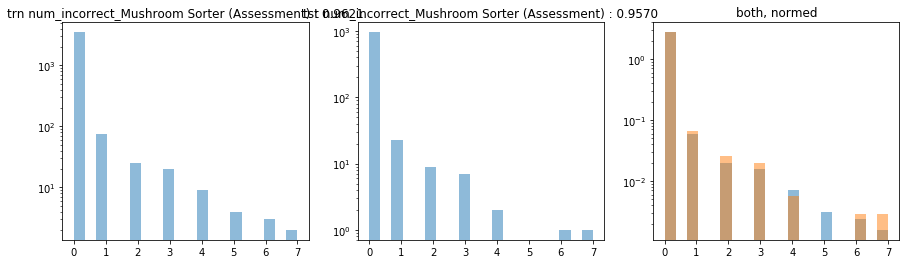

In [72]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### GameDurMiss

In [75]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/GameDurMiss.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/GameDurMiss.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- g_duration_min ---------- 


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


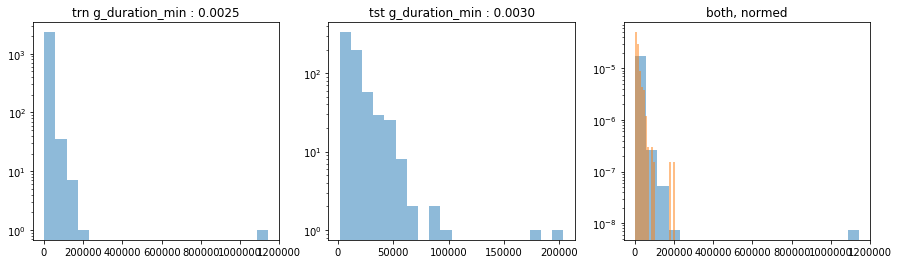

 ---------- g_duration_mean ---------- 


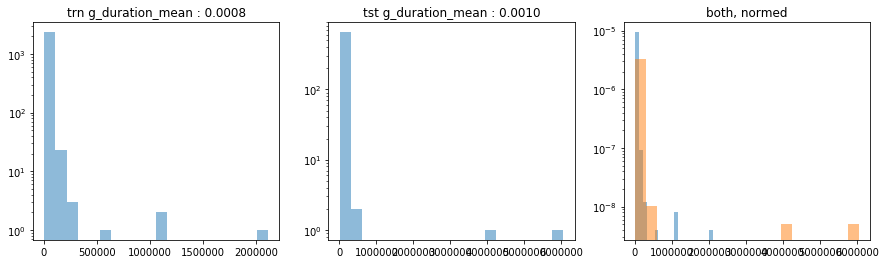

 ---------- g_duration_max ---------- 


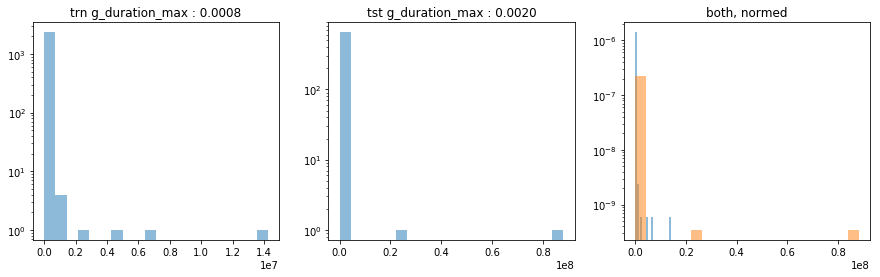

 ---------- g_duration_std ---------- 


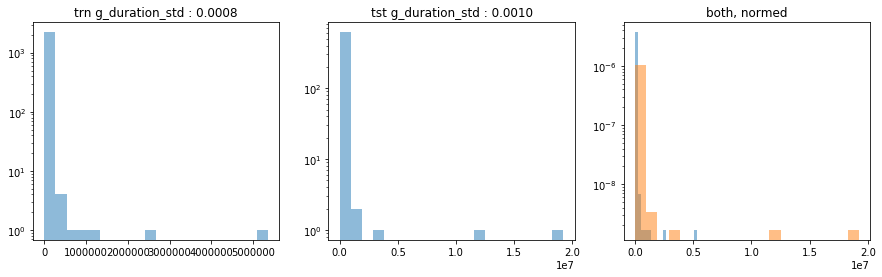

 ---------- g_duration_count ---------- 


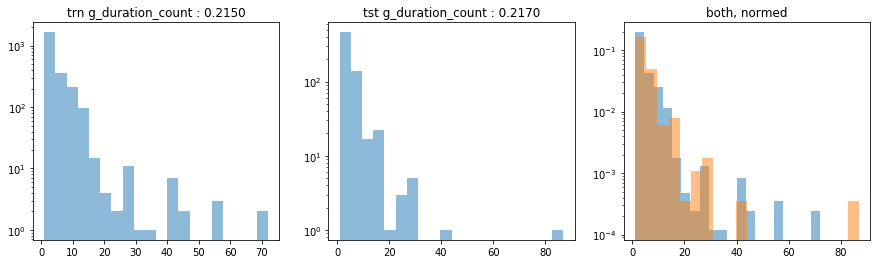

 ---------- g_misses_min ---------- 


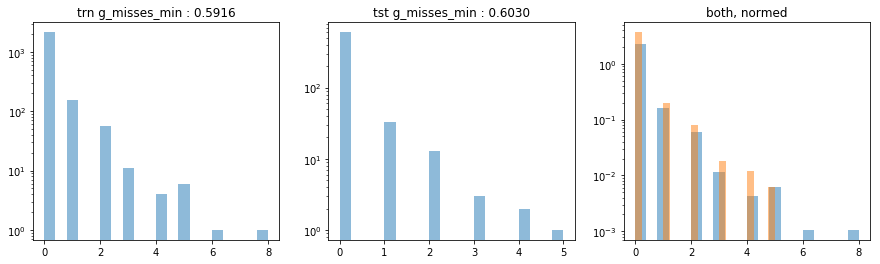

 ---------- g_misses_mean ---------- 


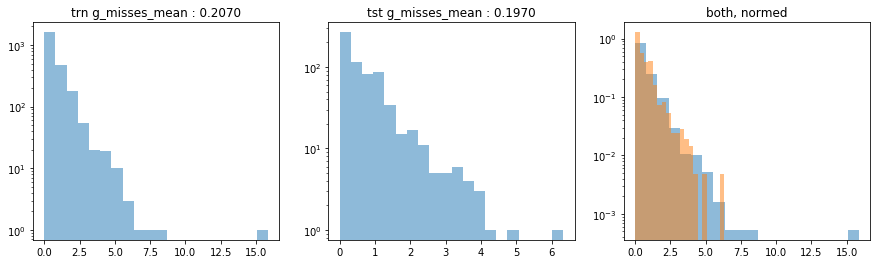

 ---------- g_misses_max ---------- 


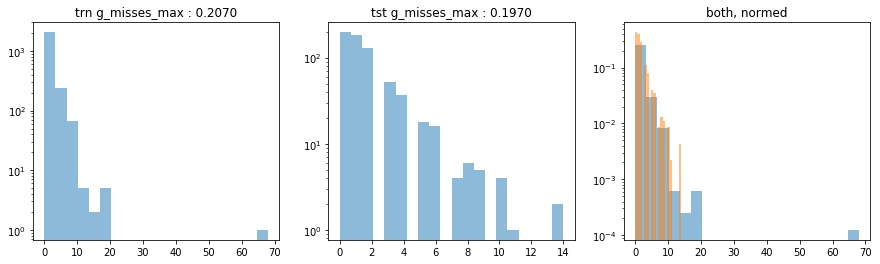

 ---------- g_misses_std ---------- 


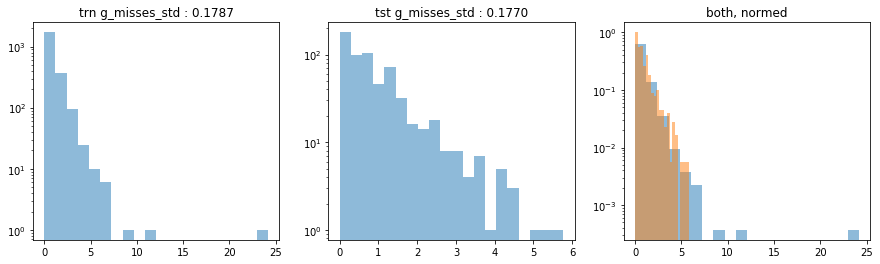

 ---------- mean_g_duration_min ---------- 


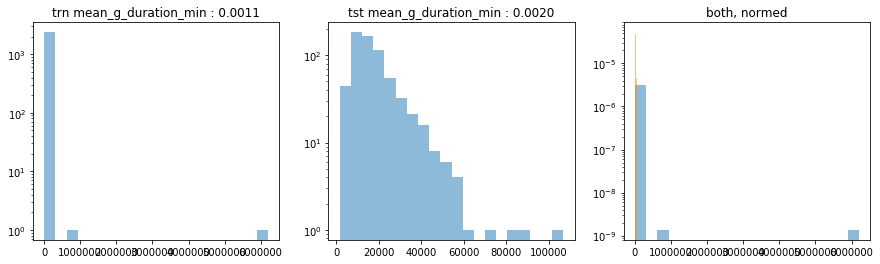

 ---------- mean_g_duration_mean ---------- 


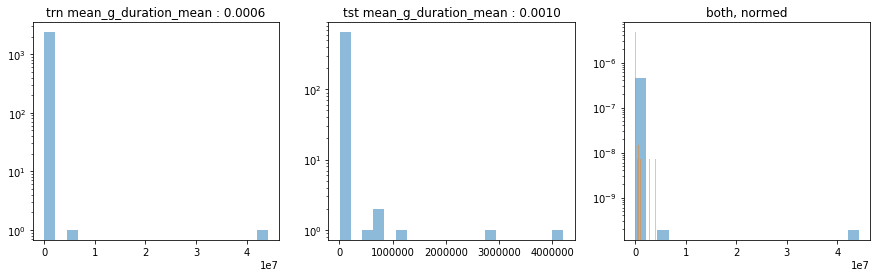

 ---------- mean_g_duration_max ---------- 


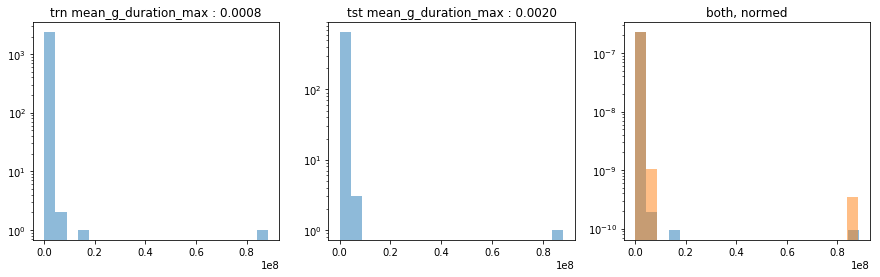

 ---------- mean_g_duration_std ---------- 


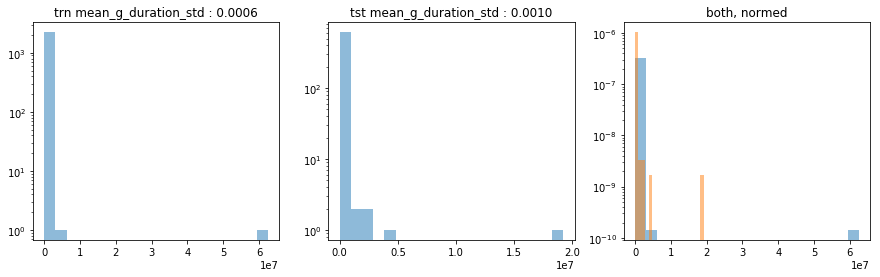

 ---------- mean_g_duration_count ---------- 


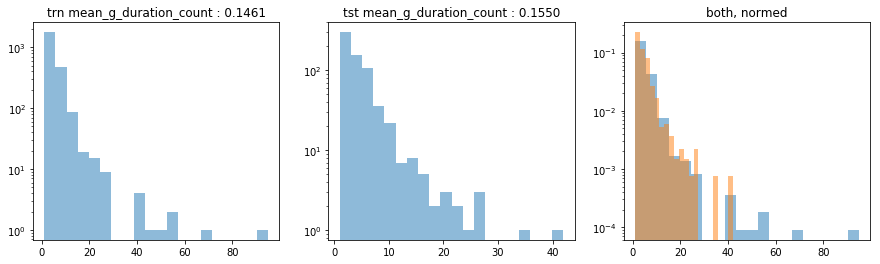

 ---------- mean_g_misses_min ---------- 


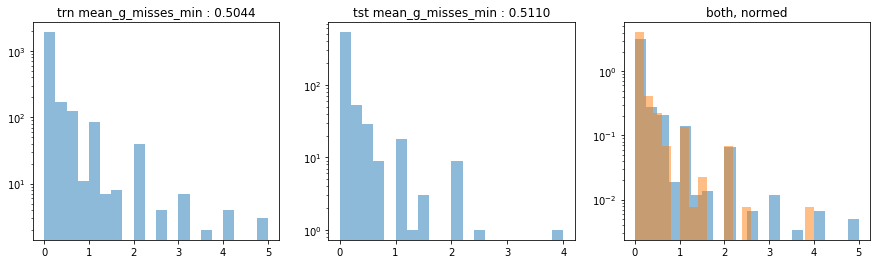

 ---------- mean_g_misses_mean ---------- 


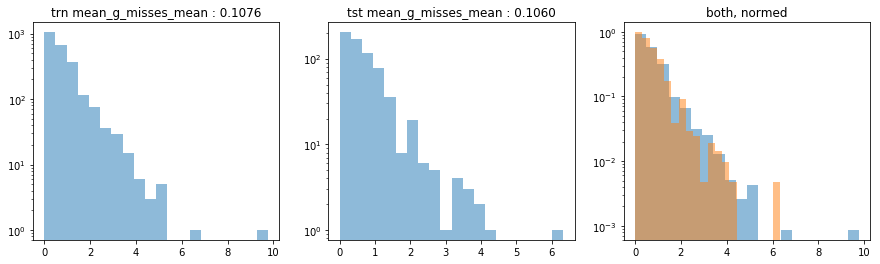

 ---------- mean_g_misses_max ---------- 


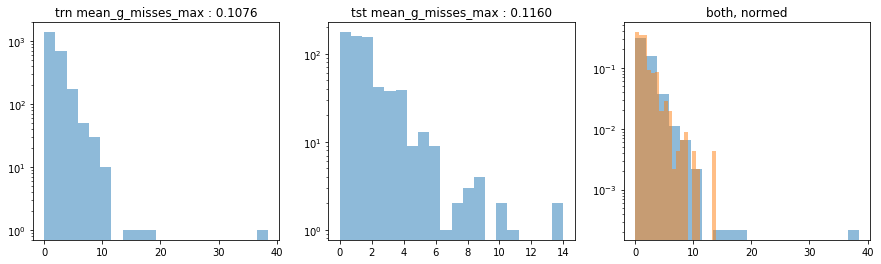

 ---------- mean_g_misses_std ---------- 


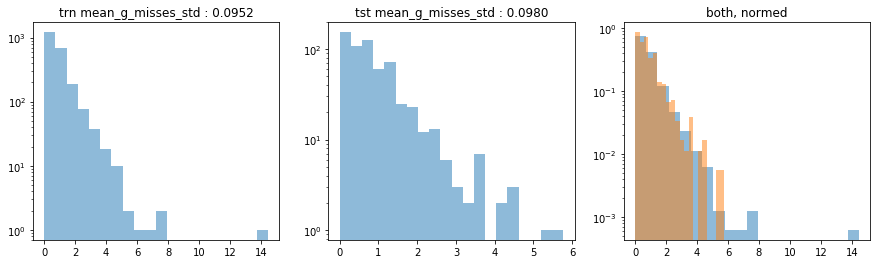

 ---------- cumnum ---------- 


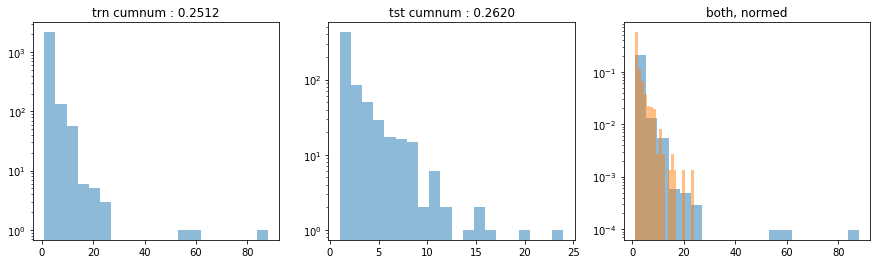

In [77]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type', 'world']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### immediatelyBeforeFeatures

In [80]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/immediatelyBeforeFeatures.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/immediatelyBeforeFeatures.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- f008_1th_before_session_event_count_max ---------- 


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


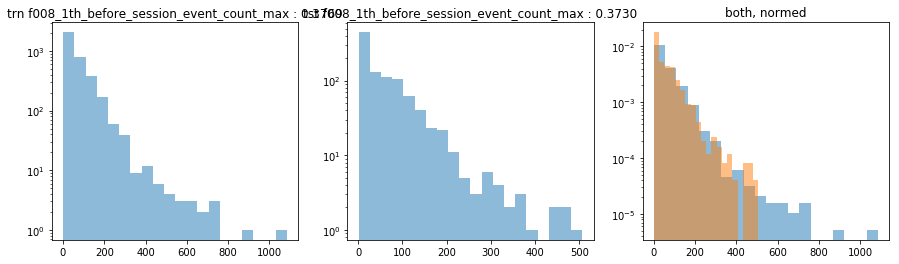

 ---------- f008_1th_before_session_event_code_last ---------- 


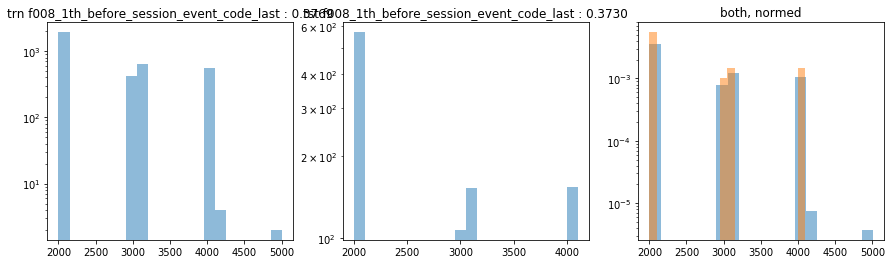

 ---------- f008_1th_before_session_game_time_max ---------- 


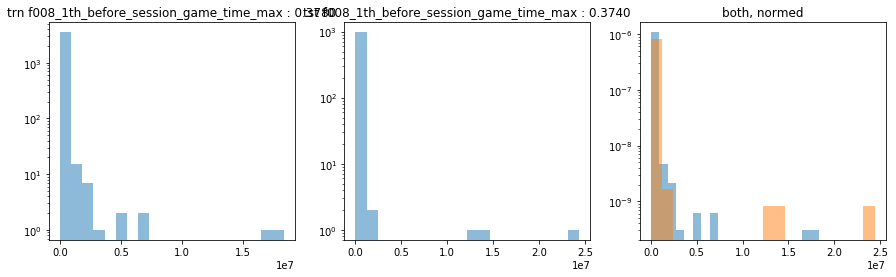

 ---------- f008_1th_before_session_game_time_skew ---------- 


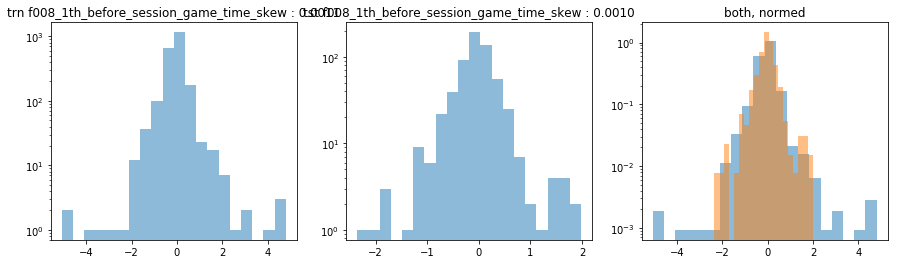

 ---------- f008_1th_before_session_game_time_kurt ---------- 


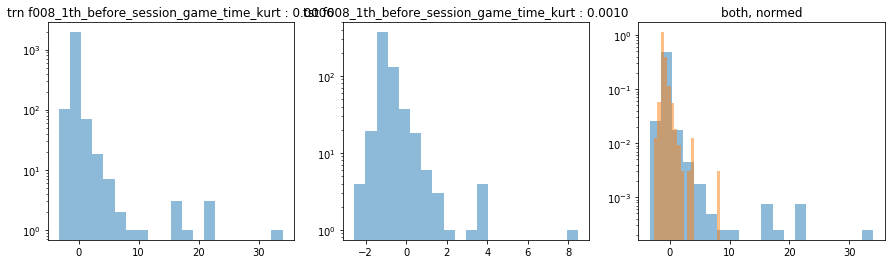

 ---------- f008_1th_before_session_title_LE ---------- 


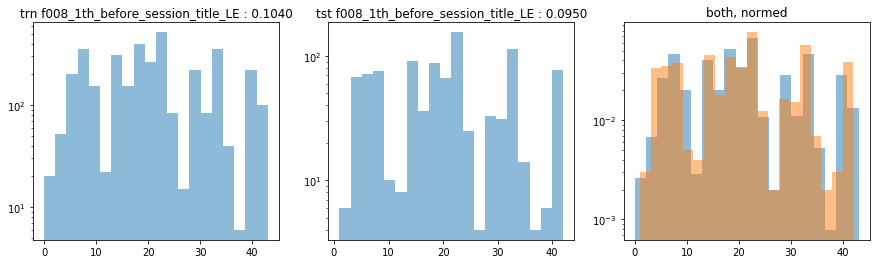

 ---------- f008_1th_before_session_type_LE ---------- 


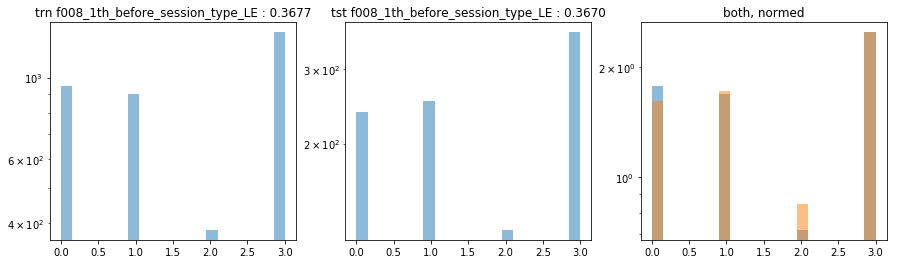

 ---------- f008_1th_before_session_world_LE ---------- 


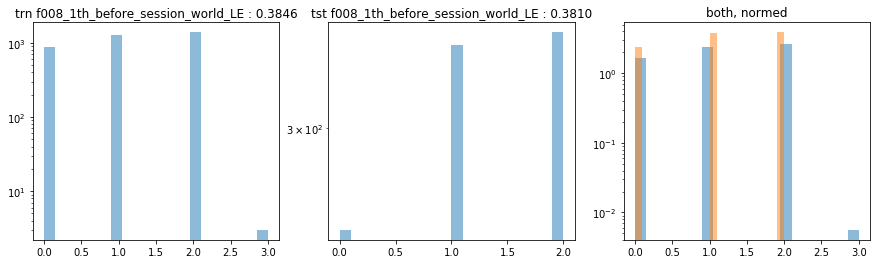

In [81]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type', 'world']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])

#### worldGameNumeriacalFeatures

In [78]:
trn_et_df = pd.read_pickle('../mnt/inputs/features/train/worldGameNumeriacalFeatures.pkl')
tst_et_df = pd.read_pickle('../mnt/inputs/features/test/worldGameNumeriacalFeatures.pkl')

trn_et_df = trn_kb_df[['game_session']].merge(trn_et_df, on=['game_session'], how='left')
tst_et_df = tst_kb_df[['game_session']].merge(tst_et_df, on=['game_session'], how='left')

 ---------- f013_worldwise_game_MAGMAPEAK_accuracy_max ---------- 


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


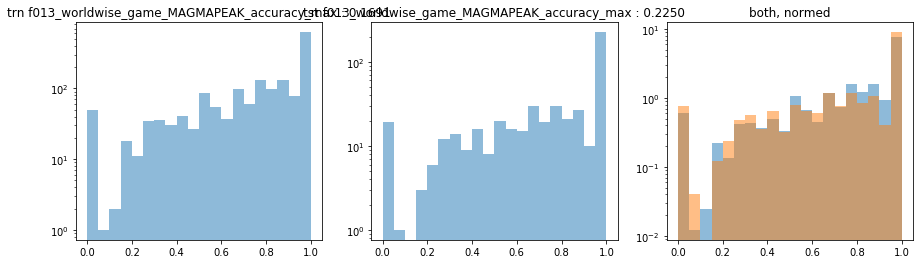

 ---------- f013_worldwise_game_MAGMAPEAK_accuracy_min ---------- 


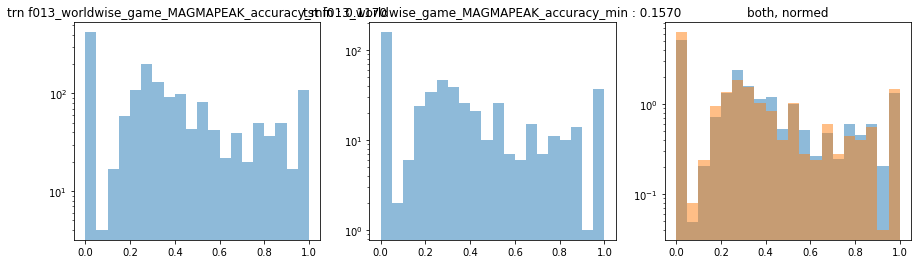

 ---------- f013_worldwise_game_MAGMAPEAK_accuracy_mean ---------- 


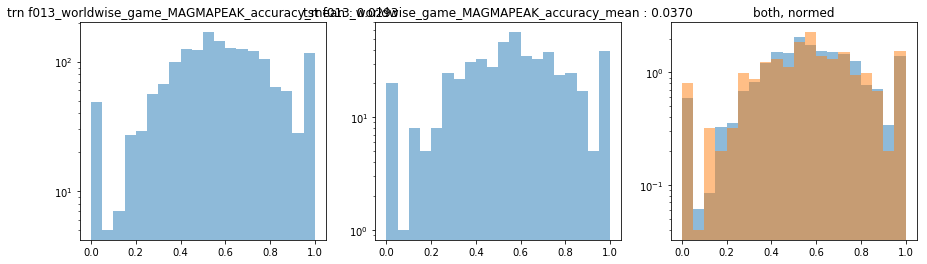

 ---------- f013_worldwise_game_MAGMAPEAK_accuracy_std ---------- 


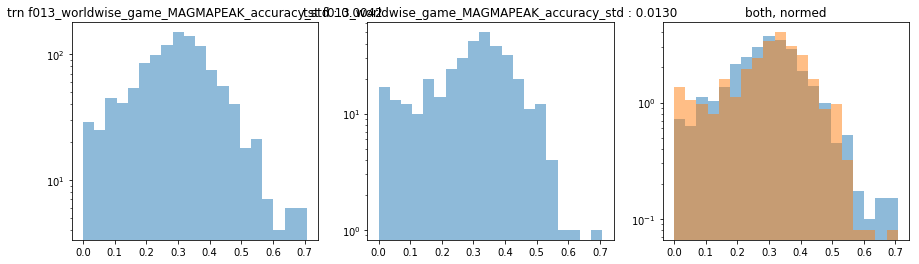

 ---------- f013_worldwise_game_MAGMAPEAK_just_before_accuracy ---------- 


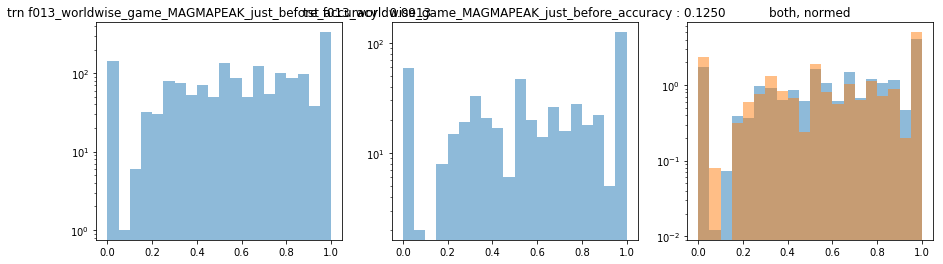

 ---------- f013_worldwise_game_CRYSTALCAVES_accuracy_max ---------- 


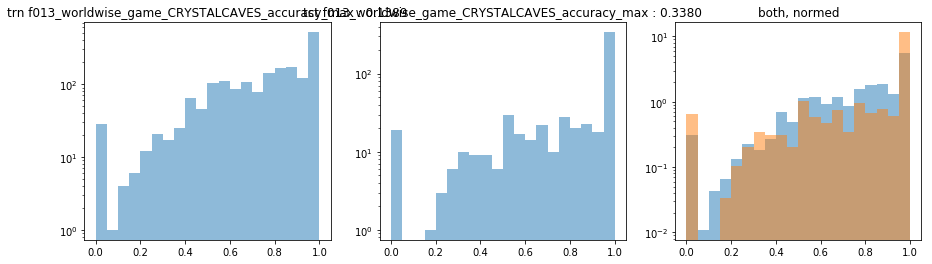

 ---------- f013_worldwise_game_CRYSTALCAVES_accuracy_min ---------- 


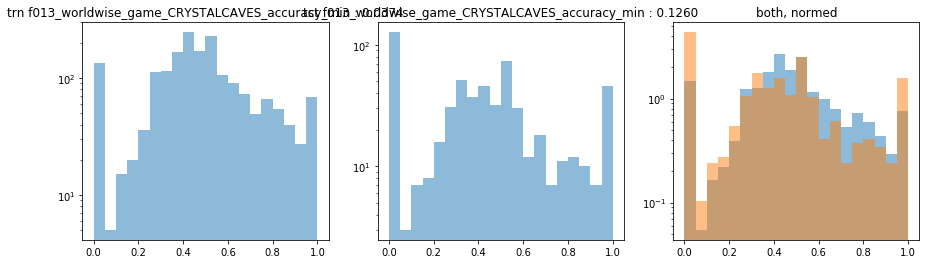

 ---------- f013_worldwise_game_CRYSTALCAVES_accuracy_mean ---------- 


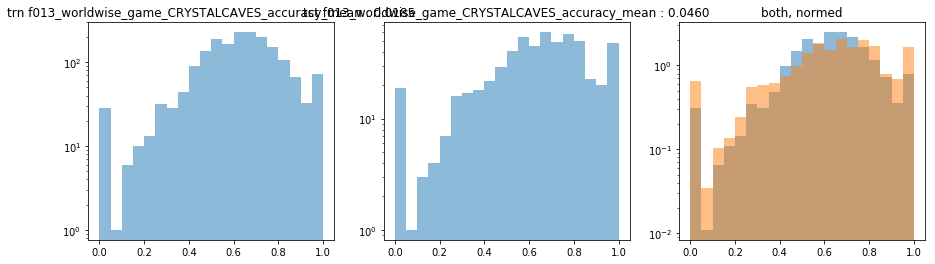

 ---------- f013_worldwise_game_CRYSTALCAVES_accuracy_std ---------- 


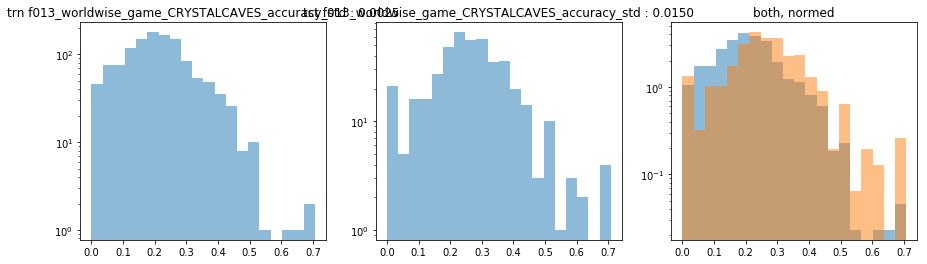

 ---------- f013_worldwise_game_CRYSTALCAVES_just_before_accuracy ---------- 


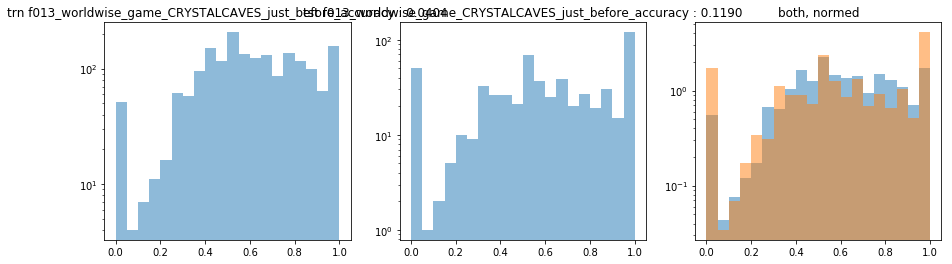

 ---------- f013_worldwise_game_TREETOPCITY_accuracy_max ---------- 


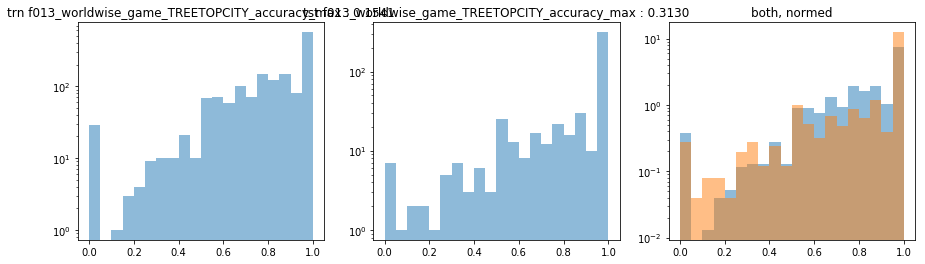

 ---------- f013_worldwise_game_TREETOPCITY_accuracy_min ---------- 


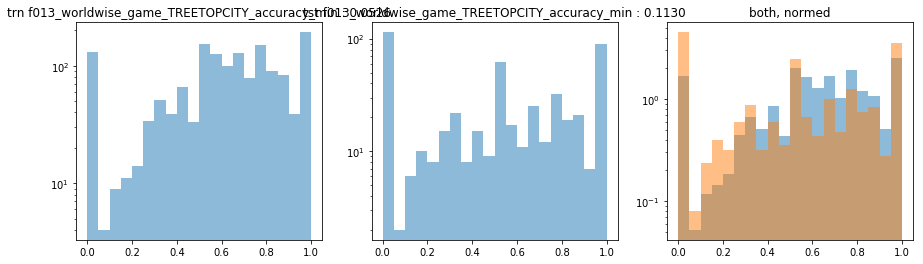

 ---------- f013_worldwise_game_TREETOPCITY_accuracy_mean ---------- 


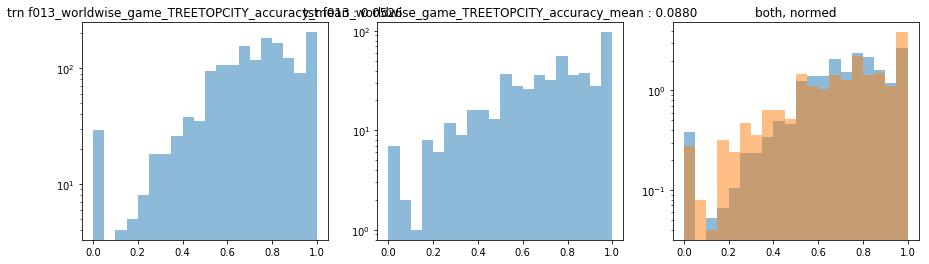

 ---------- f013_worldwise_game_TREETOPCITY_accuracy_std ---------- 


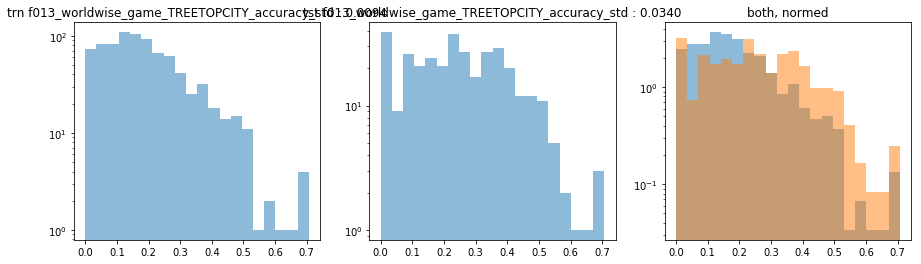

 ---------- f013_worldwise_game_TREETOPCITY_just_before_accuracy ---------- 


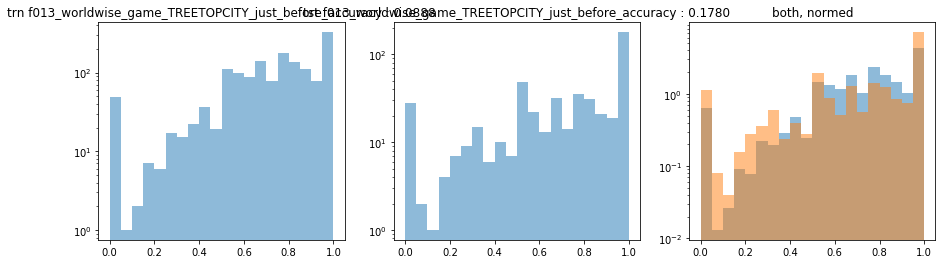

 ---------- f013_worldwise_game_NONE_accuracy_max ---------- 


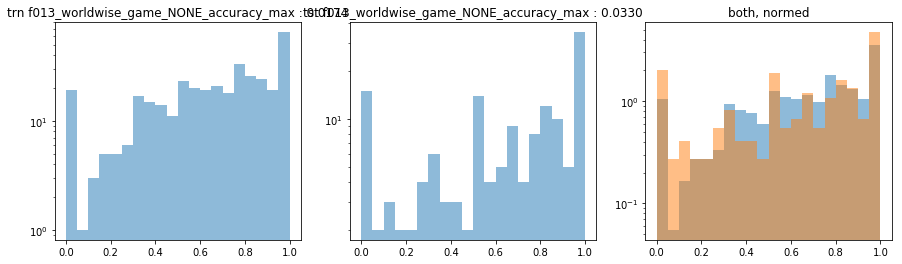

 ---------- f013_worldwise_game_NONE_accuracy_min ---------- 


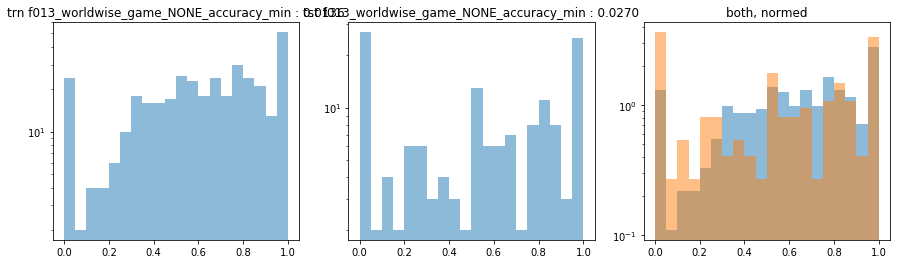

 ---------- f013_worldwise_game_NONE_accuracy_mean ---------- 


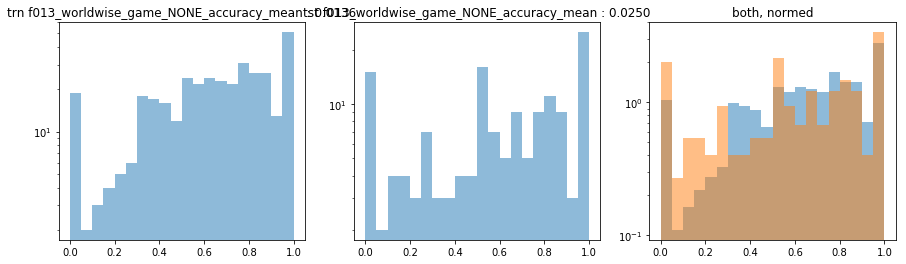

 ---------- f013_worldwise_game_NONE_accuracy_std ---------- 


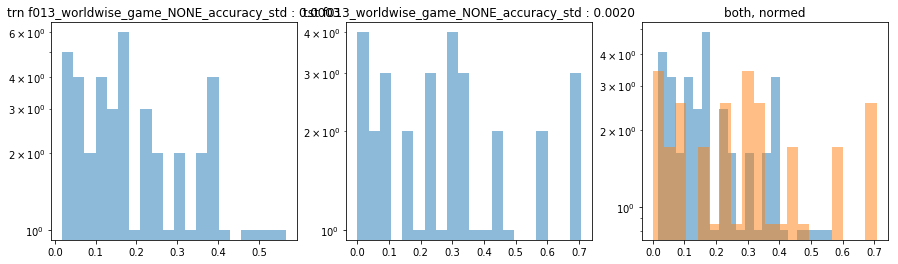

 ---------- f013_worldwise_game_NONE_just_before_accuracy ---------- 


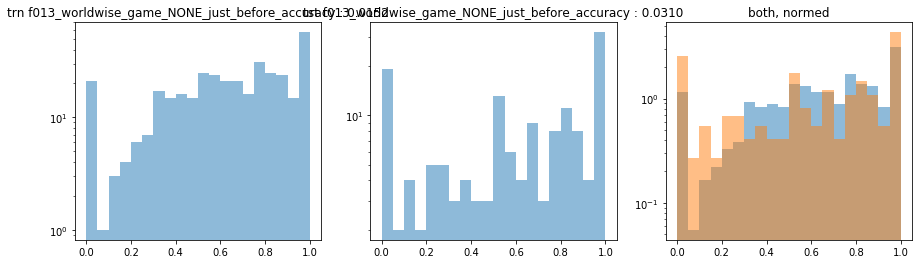

 ---------- f013_worldwise_game_world_accracy_mean_mean ---------- 


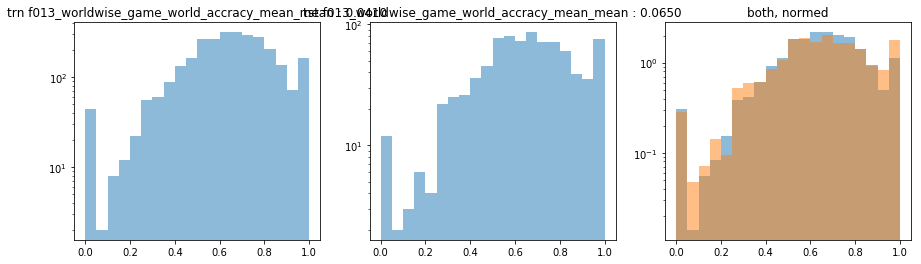

 ---------- f013_worldwise_game_world_accracy_mean_std ---------- 


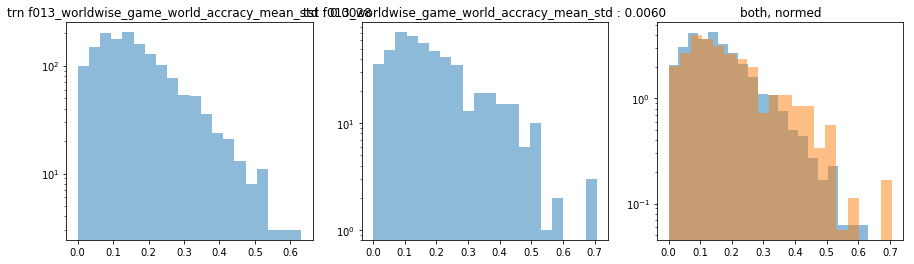

 ---------- f013_worldwise_game_world_accracy_max_max ---------- 


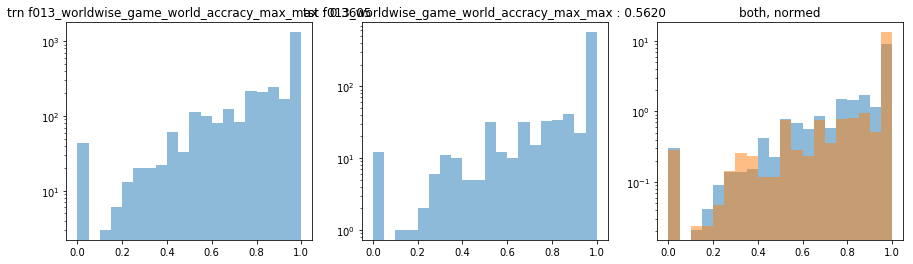

 ---------- f013_worldwise_game_world_accracy_max_mean ---------- 


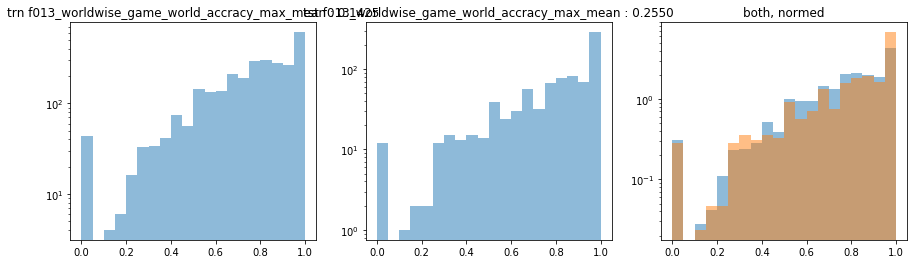

 ---------- f013_worldwise_game_world_accracy_max_std ---------- 


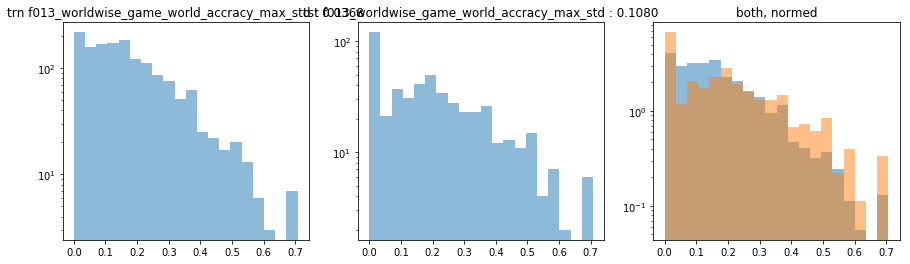

 ---------- f013_worldwise_game_world_accracy_min_min ---------- 


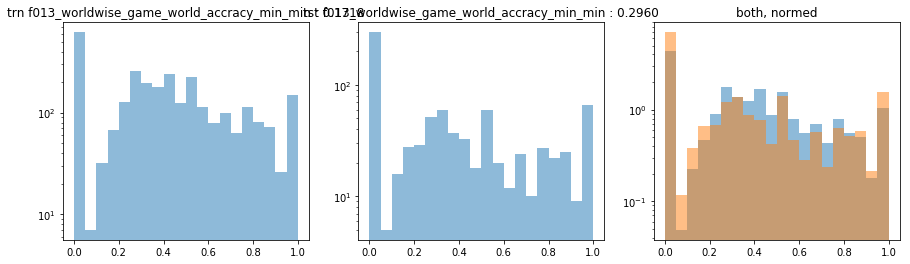

 ---------- f013_worldwise_game_world_accracy_min_mean ---------- 


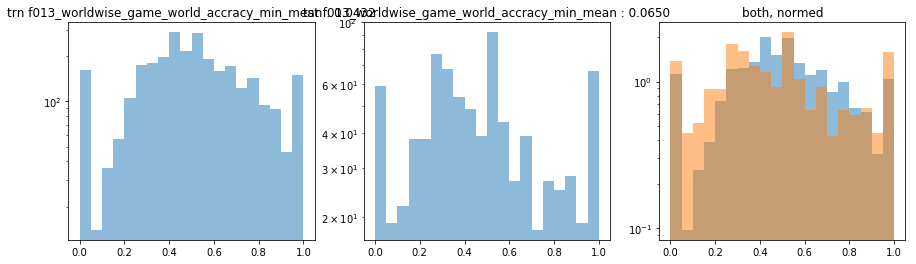

 ---------- f013_worldwise_game_world_accracy_min_std ---------- 


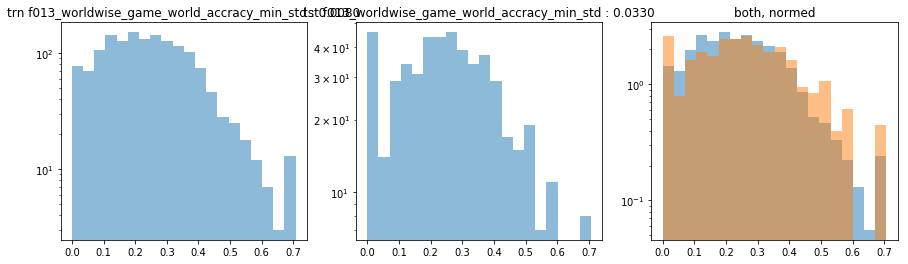

 ---------- f013_worldwise_game_world_accracy_std_mean ---------- 


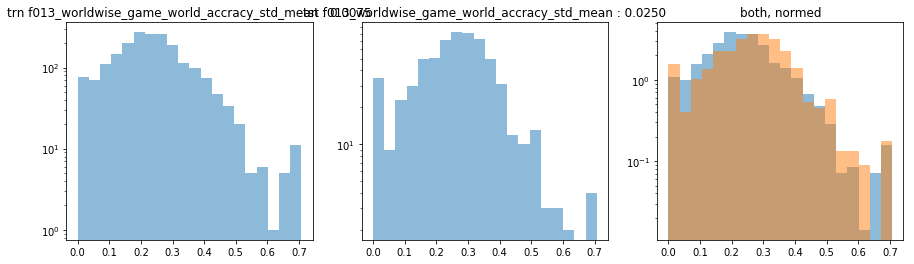

 ---------- f013_worldwise_game_world_accracy_std_std ---------- 


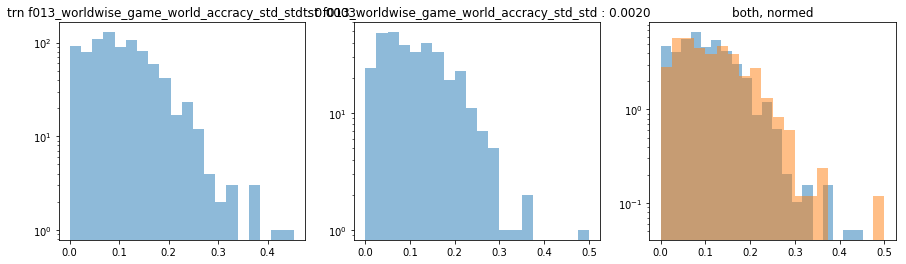

In [79]:
for col in tst_et_df.columns:
    if col not in ['game_session', 'installation_id', 'type', 'world']:
        plot_trn_vs_tst(trn_et_df[col], tst_et_df[col])